# 💔Heart Failure Prediction (M.L 🆚 D.L) :-
## Machine Learning & Deep Learning :

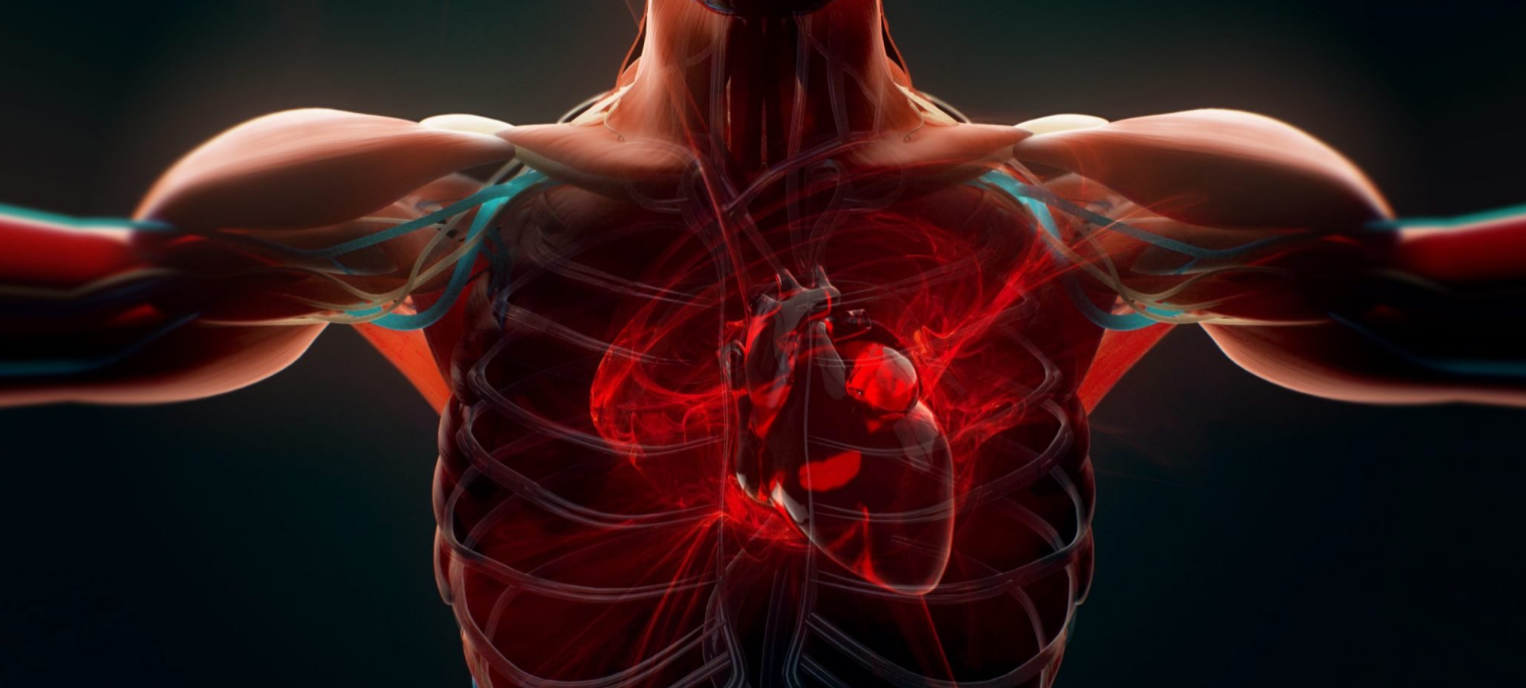

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Heart.png")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\heart_failure_clinical_records_dataset.csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [4]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [5]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [7]:
df.nunique().sum()

675

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.isnull()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                     False     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                     False     False              False   
296  False    False                     False     False              False   
297  False    False                     False     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium    sex  \
0                  False      False             False         False  False   
1                  False      False             False         False  False   
2                  False      False             False         False  False   
3                  False      False             False         False  False   
4                  False      False             False         False  False   
..                   ...        ...               ...           ...    ...   
294                False      False             False         False  False   
295                False      False             False         False  False   
296                False      False             False         False  False   
297                False      False             False         False  False   
298                False      False             False         False  False   

     smoking   time  DEATH_EVENT  
0      False  False        False  
1      False  False        False  
2      False  False        False  
3      False  False        False  
4      False  False        False  
..       ...    ...          ...  
294    False  False        False  
295    False  False        False  
296    False  False        False  
297    False  False        False  
298    False  False        False  

[299 rows x 13 columns]

In [12]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [14]:
df1=df.copy()
df2=df1.copy()

In [15]:
df.shape

(299, 13)

## Pair Plot Of Data : 

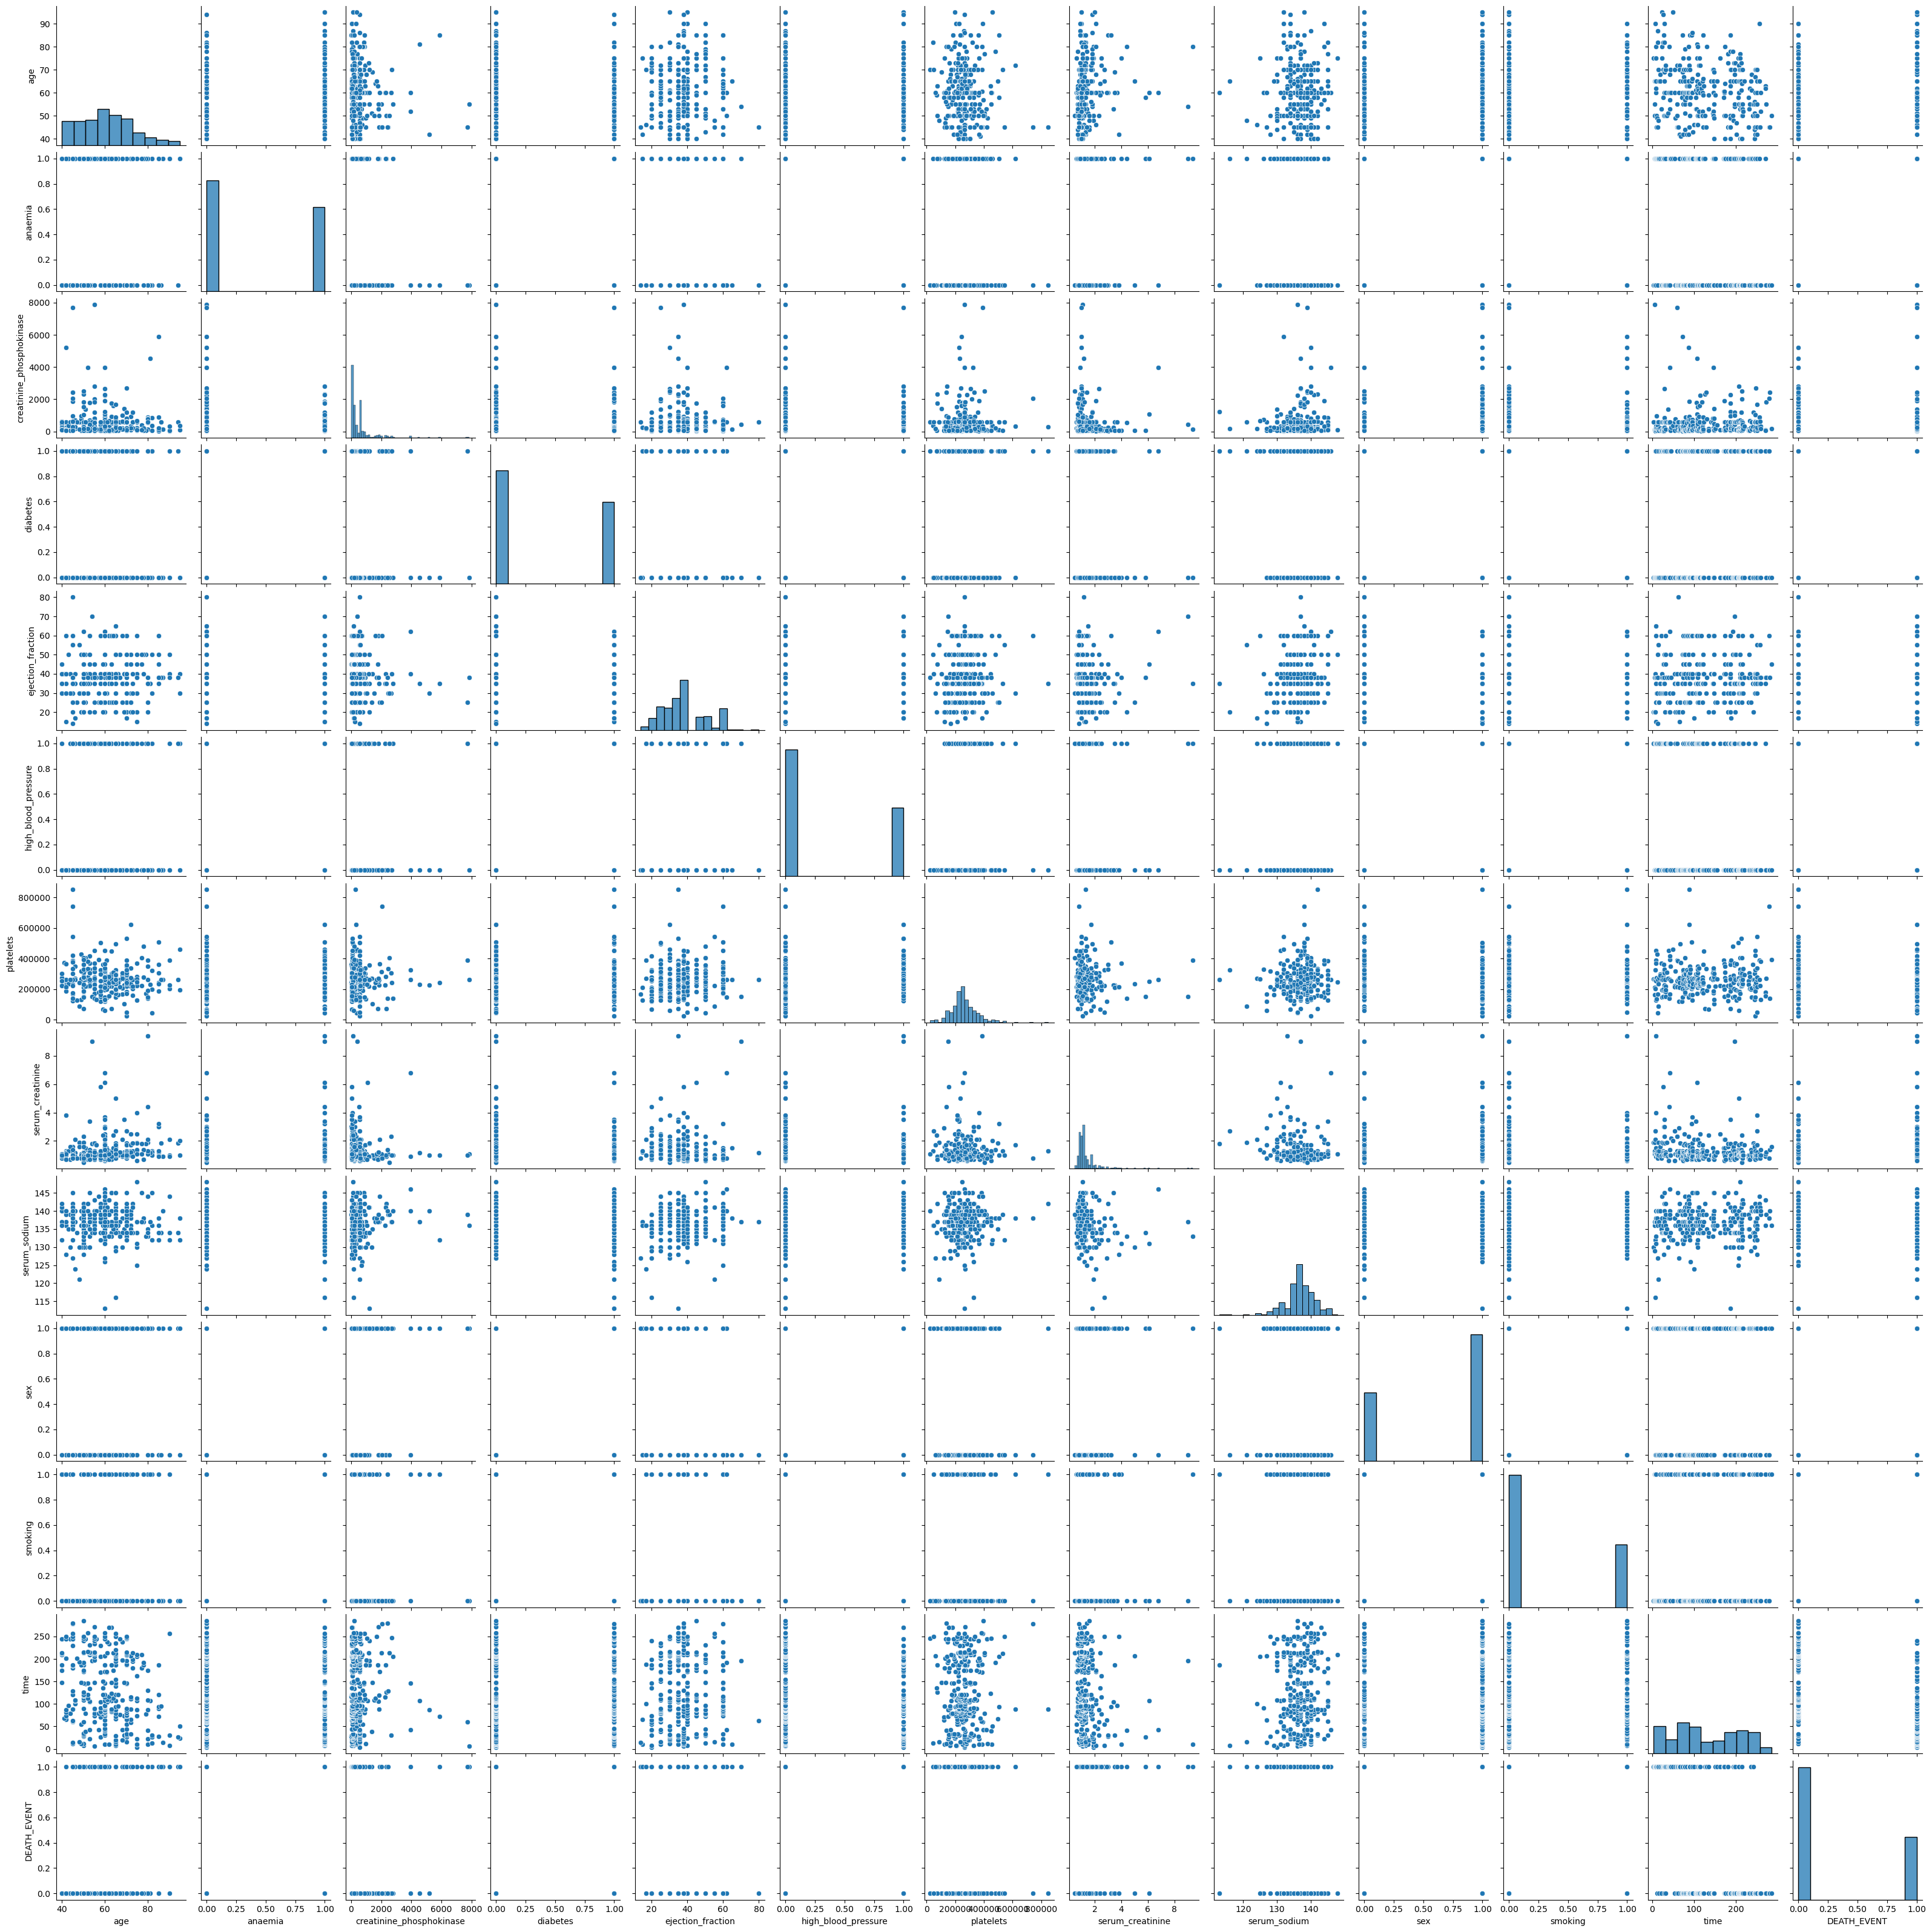

In [16]:
sns.pairplot(df)

## Correlation Plot :

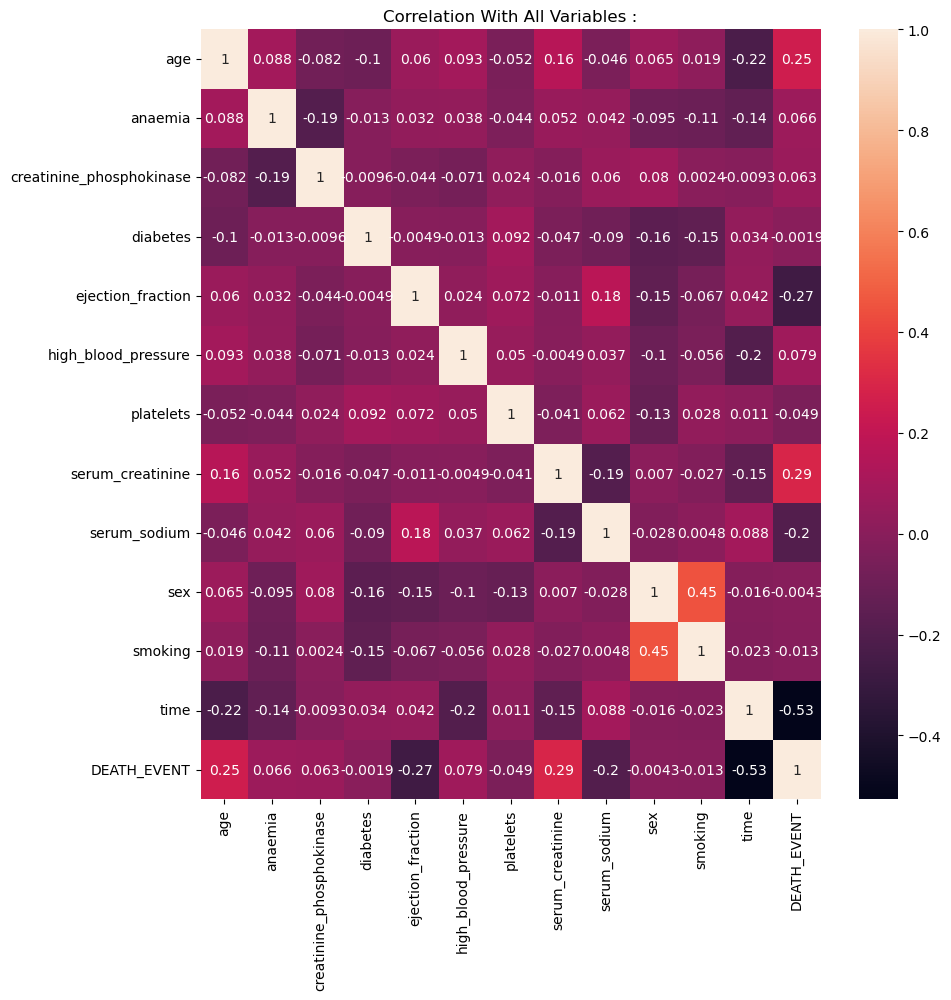

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation With All Variables :')
plt.show()

## Distribution Plot :

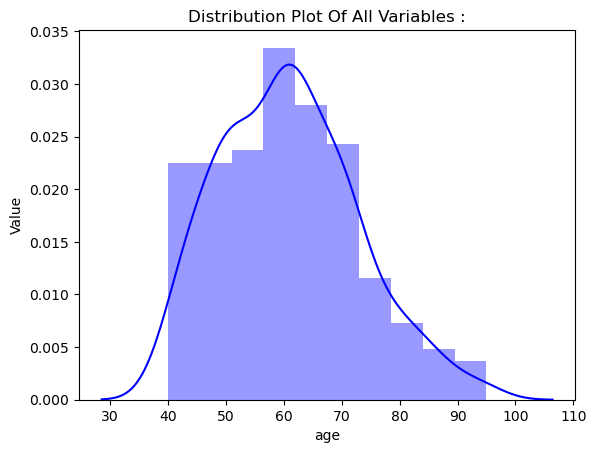

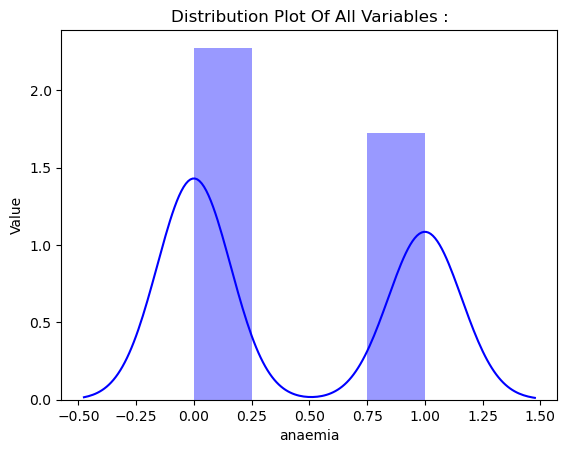

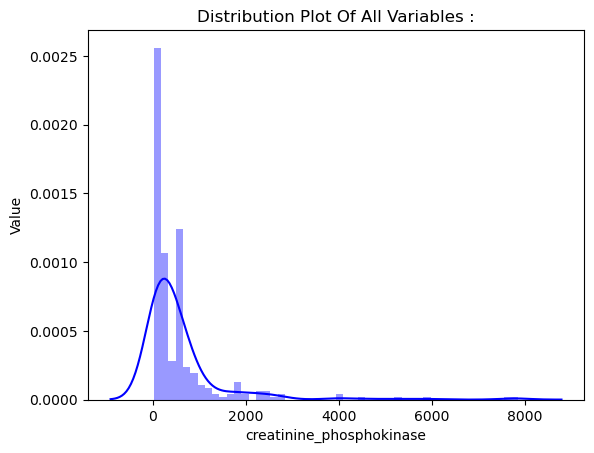

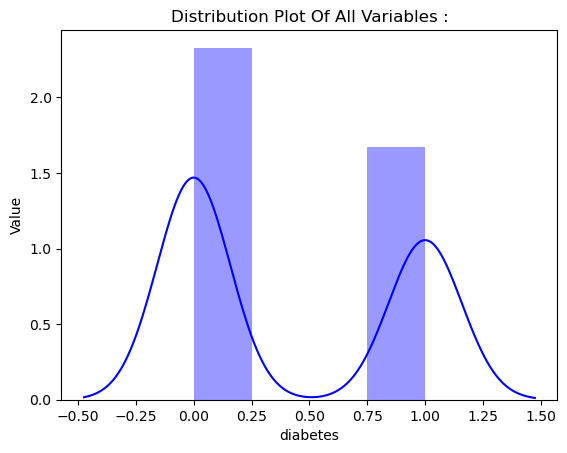

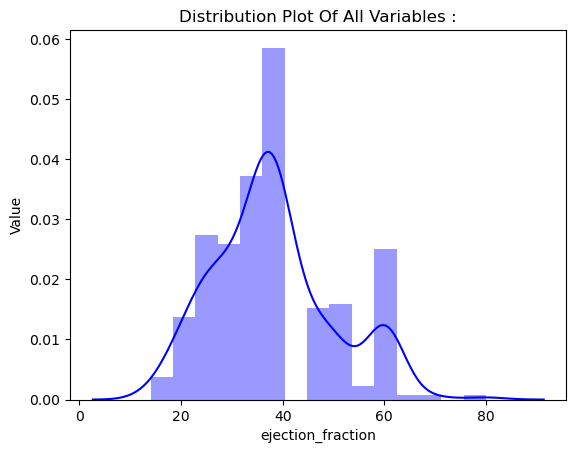

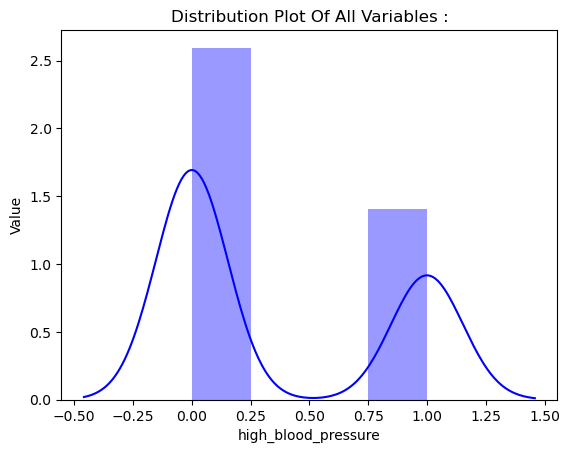

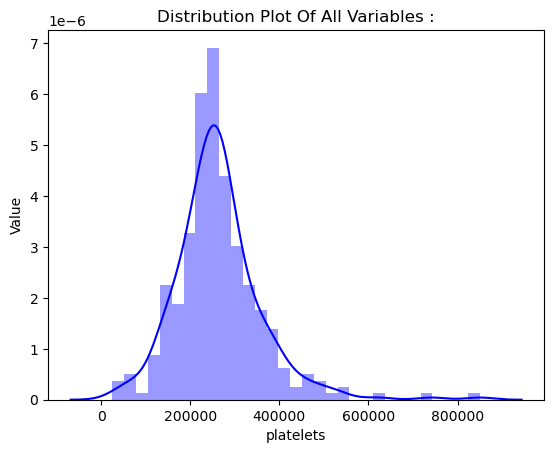

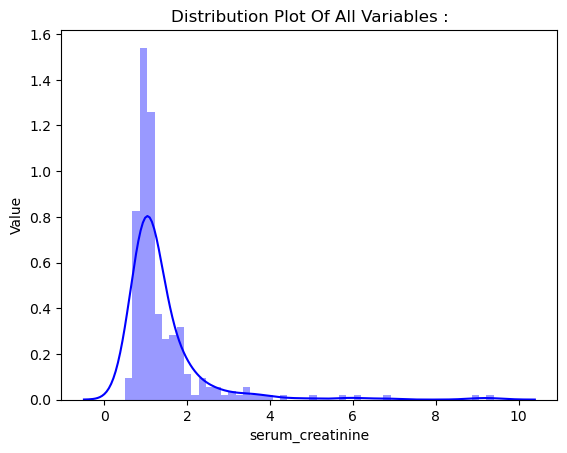

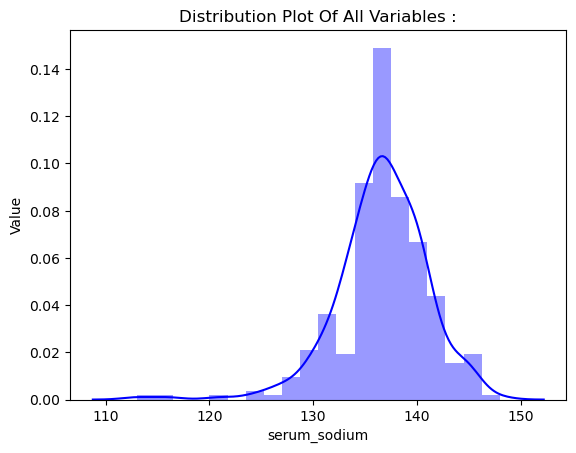

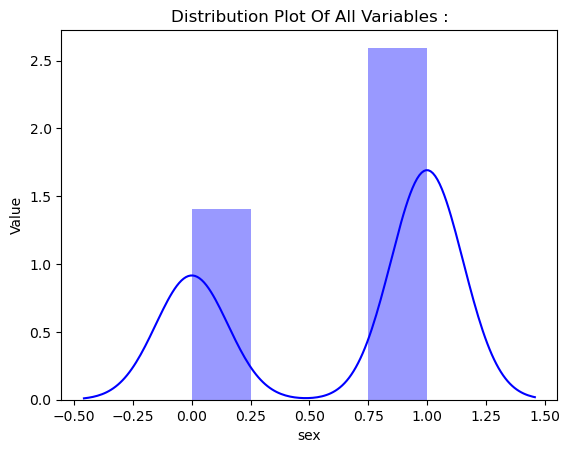

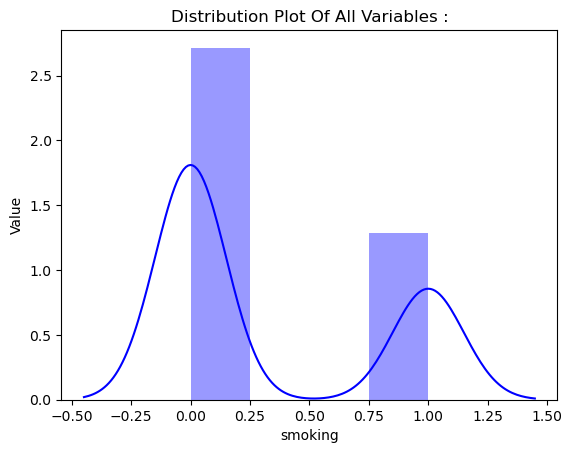

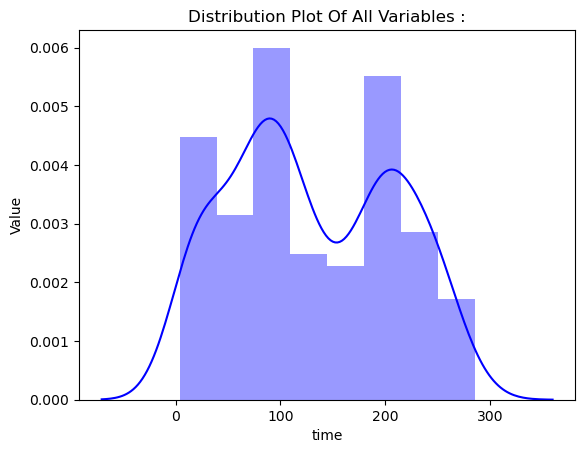

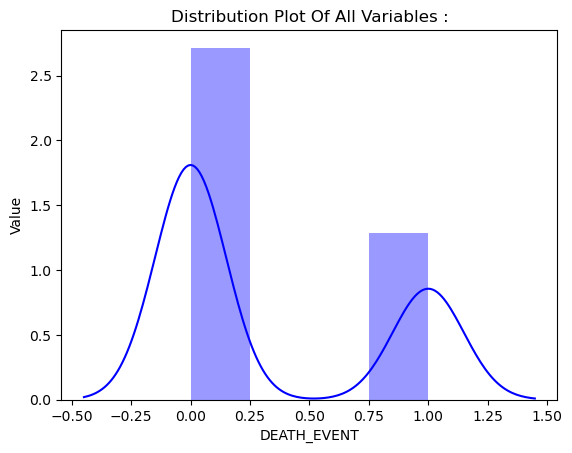

In [18]:
for i in df.columns:
    sns.distplot(df[i],color='blue')
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title('Distribution Plot Of All Variables :')
    plt.show()

## Count Of Unique Value In Columns : 

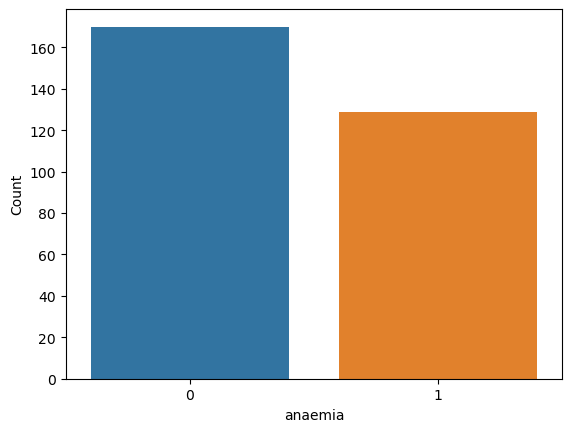

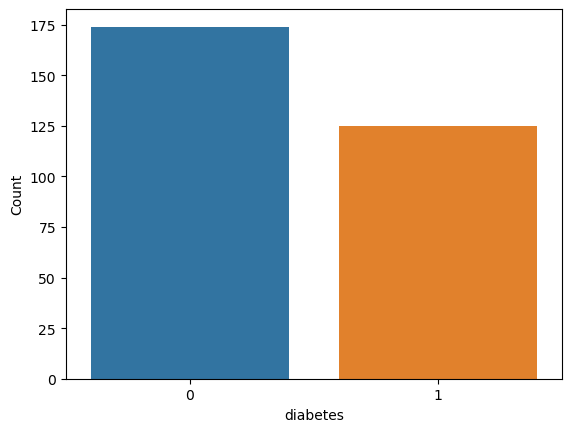

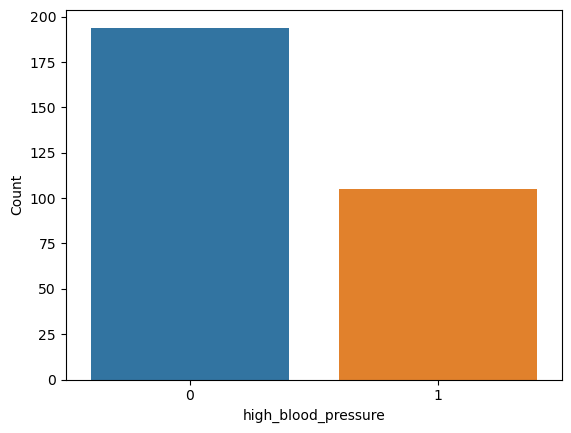

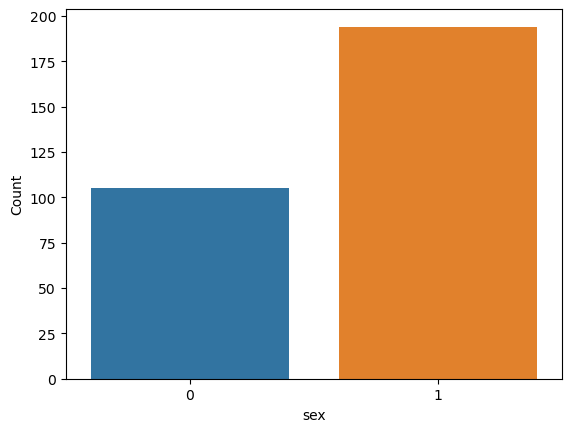

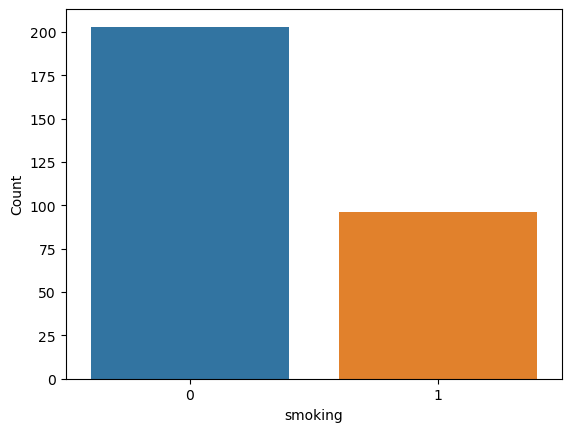

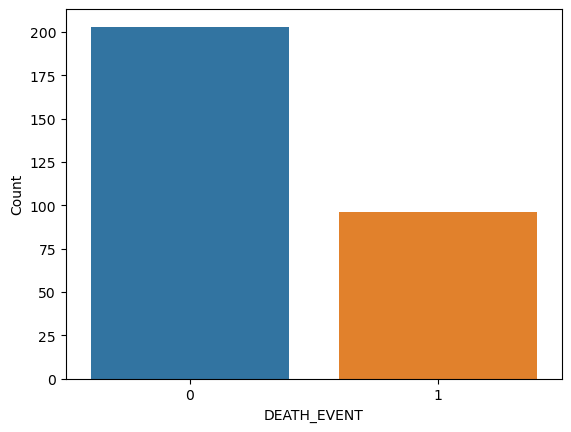

In [19]:
for c in df[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]:
    sns.countplot(df[c])
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

In [20]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

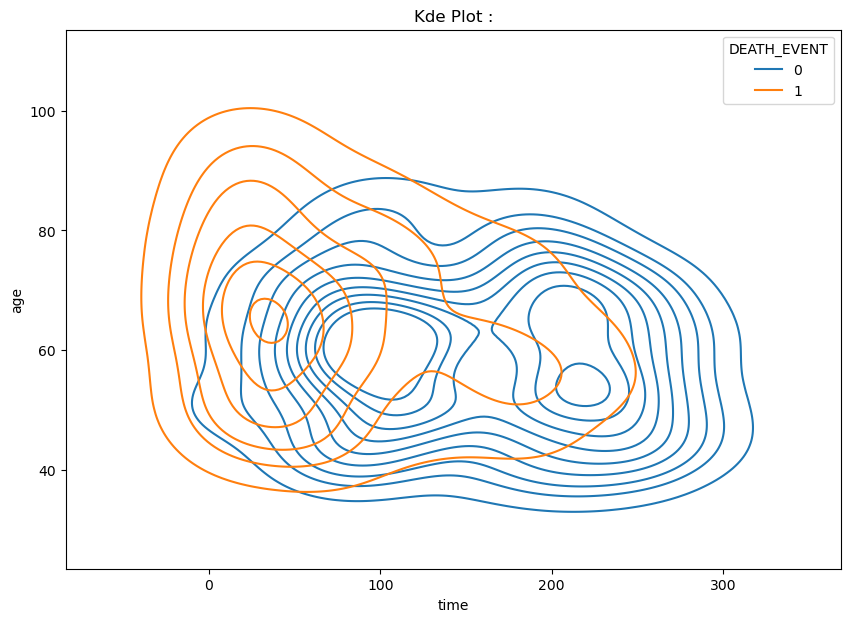

In [21]:
plt.figure(figsize=(10,7))
sns.kdeplot(x=df['time'],y=df['age'],hue=df['DEATH_EVENT'])
plt.title('Kde Plot :')
plt.show()

## Variance Inflation Factor (VIF) : 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
v=df.drop(['DEATH_EVENT'],axis=1)
vif=pd.DataFrame({'Variables':v.columns})
vif['Vif']=[variance_inflation_factor(v.values,i)
           for i in range(len(v.columns))]
vif

Variables        Vif
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5        high_blood_pressure   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                        sex   3.795155
10                   smoking   1.892753
11                      time   4.351441

## Correlation Plot :

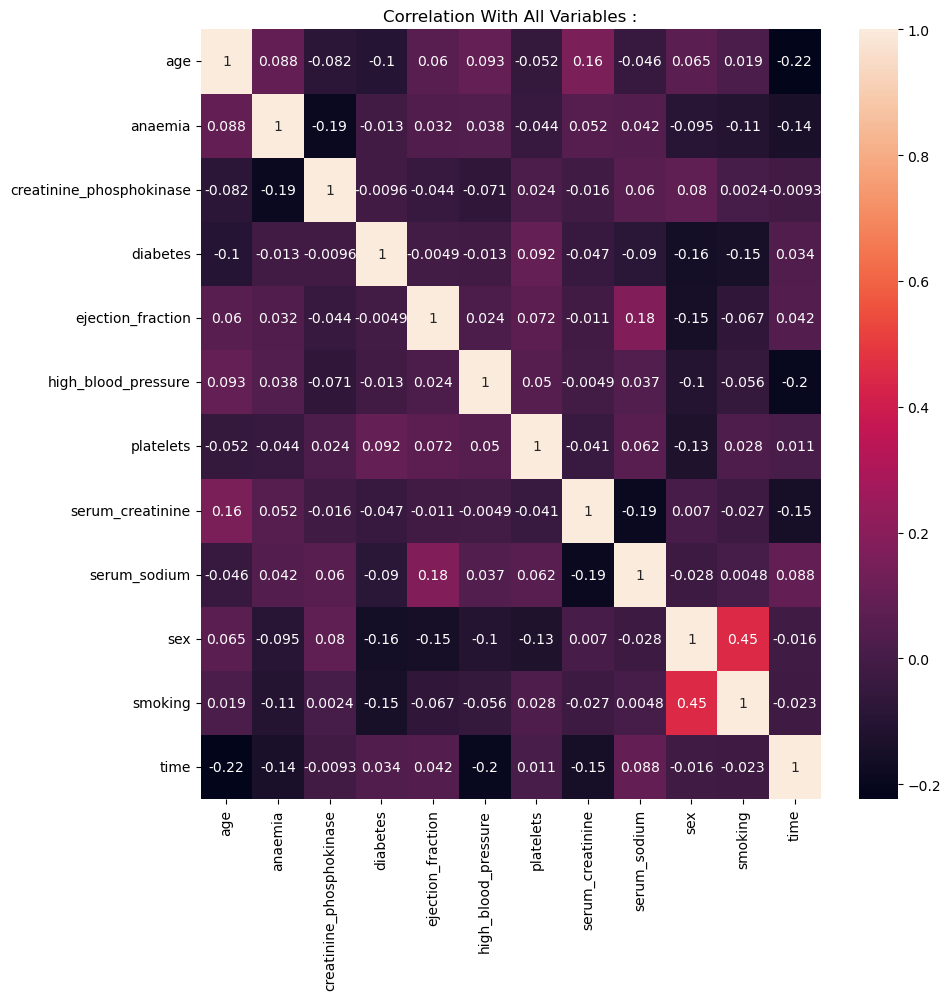

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap((df.drop(['DEATH_EVENT'],axis=1)).corr(),annot=True)
plt.title('Correlation With All Variables :')
plt.show()

## Outlier Detection :

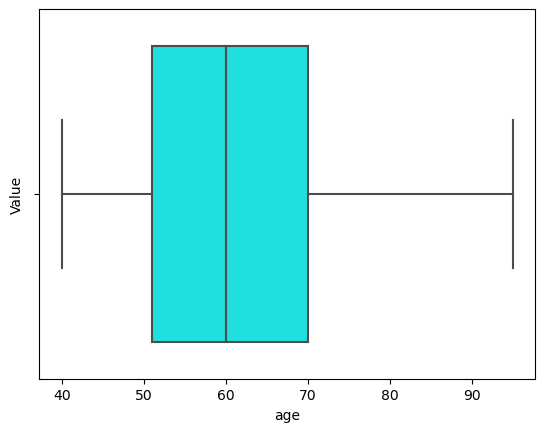

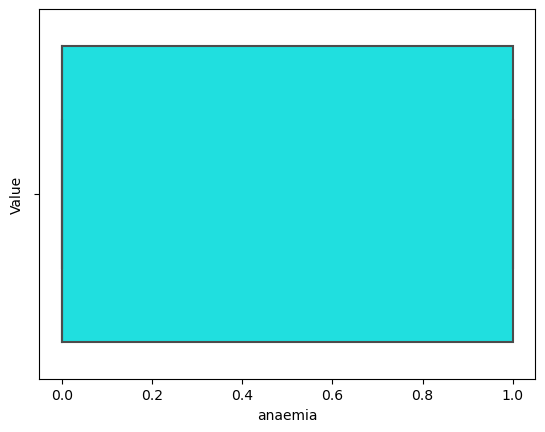

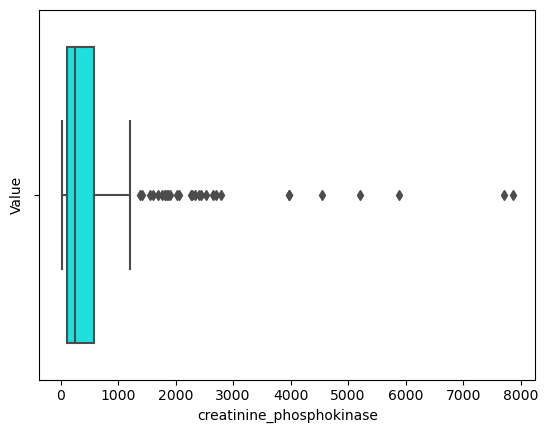

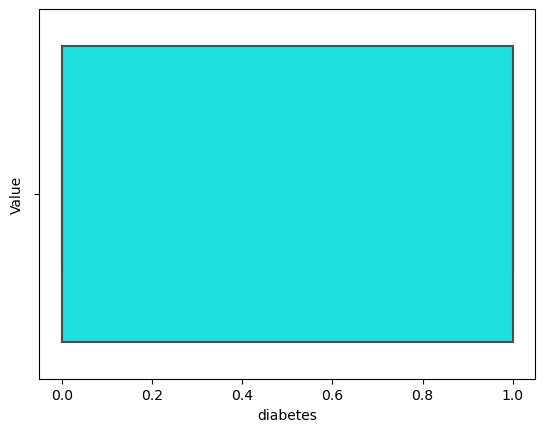

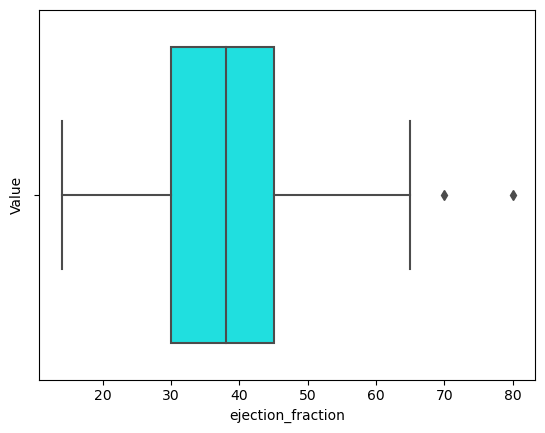

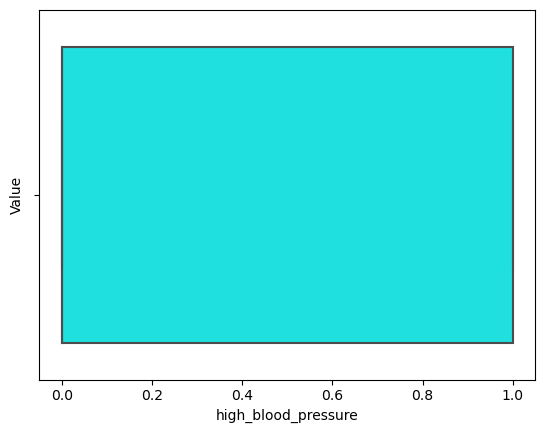

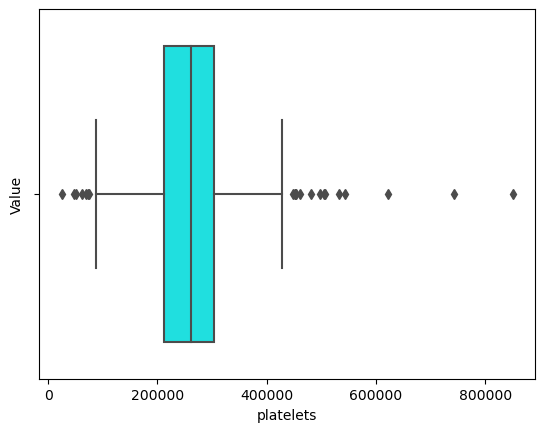

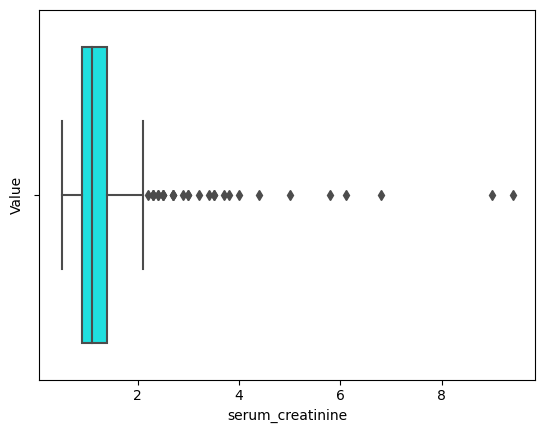

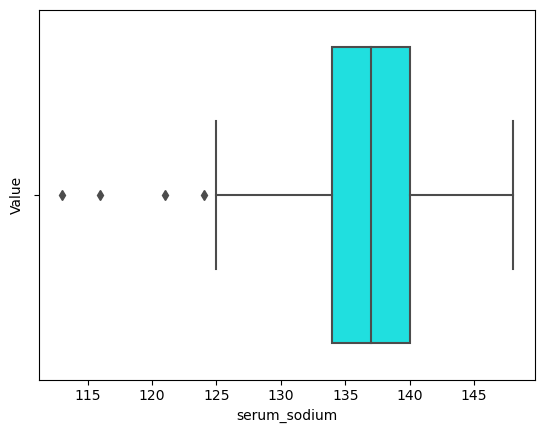

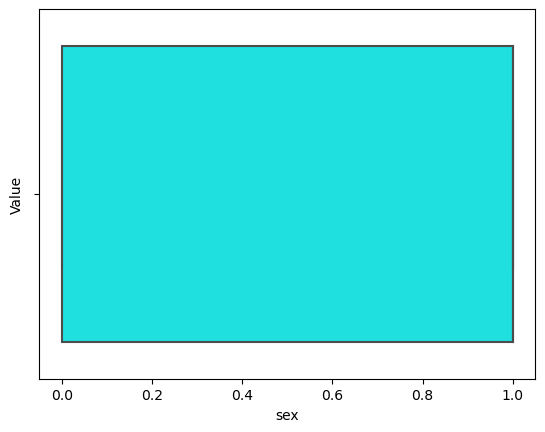

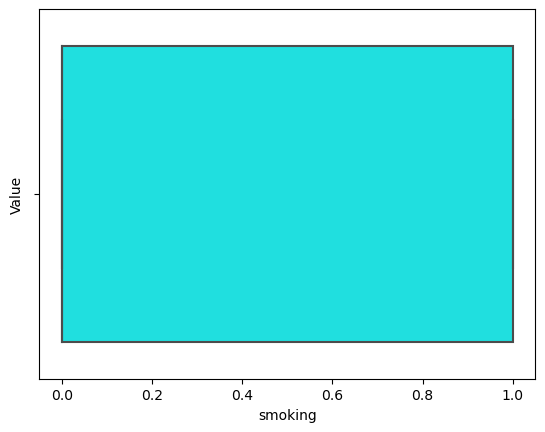

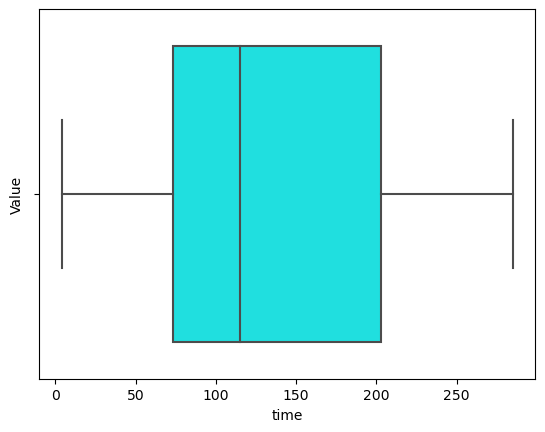

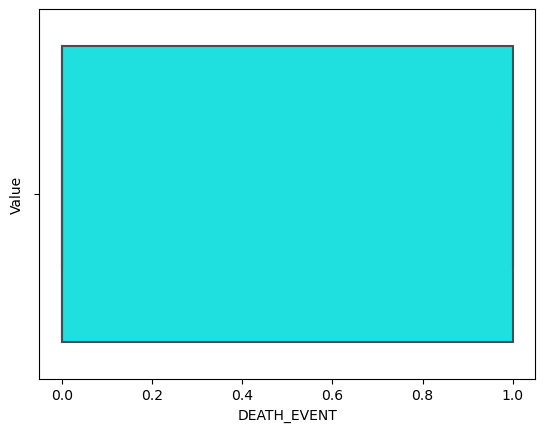

In [25]:
for o in df.columns:
    sns.boxplot(df[o],color='cyan')
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

## Outlier Treatment :

In [26]:
Q1 = np.percentile(df['creatinine_phosphokinase'],25)
Q3 = np.percentile(df['creatinine_phosphokinase'],75)
IQR = Q3 - Q1
lower_fense = Q1 - (1.5*IQR)
upper_fense = Q3 + (1.5*IQR)

Q11 = np.percentile(df['ejection_fraction'],25)
Q31 = np.percentile(df['ejection_fraction'],75)
IQR1 = Q31 - Q11
lower_fense1 = Q11 - (1.5*IQR1)
upper_fense1 = Q31 + (1.5*IQR1)

Q12 = np.percentile(df['platelets'],25)
Q32 = np.percentile(df['platelets'],75)
IQR2 = Q32 - Q12
lower_fense2 = Q12 - (1.5*IQR2)
upper_fense2 = Q32 + (1.5*IQR2)

Q13 = np.percentile(df['serum_creatinine'],25)
Q33 = np.percentile(df['serum_creatinine'],75)
IQR3 = Q33 - Q13
lower_fense3 = Q13 - (1.5*IQR3)
upper_fense3 = Q33 + (1.5*IQR3)

Q14 = np.percentile(df['serum_sodium'],25)
Q34 = np.percentile(df['serum_sodium'],75)
IQR4 = Q34 - Q14
lower_fense4 = Q14 - (1.5*IQR4)
upper_fense4 = Q34 + (1.5 * IQR4)

In [27]:
a=df.loc[(df['creatinine_phosphokinase']>= lower_fense) & (df['creatinine_phosphokinase']<= upper_fense)]
b=a.loc[(a['ejection_fraction']>= lower_fense1) & (a['ejection_fraction']<= upper_fense1)]
c=b.loc[(b['platelets']>= lower_fense2) & (b['platelets']<= upper_fense2)]
d=c.loc[(c['serum_creatinine']>= lower_fense3) & (c['serum_creatinine']<= upper_fense3)]
e = d.loc[(d['serum_sodium'] >= lower_fense4) & (d['serum_sodium'] <= upper_fense4)]

## After Outlier Treatment :

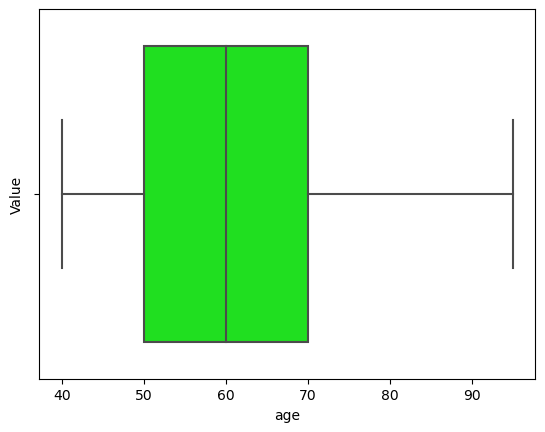

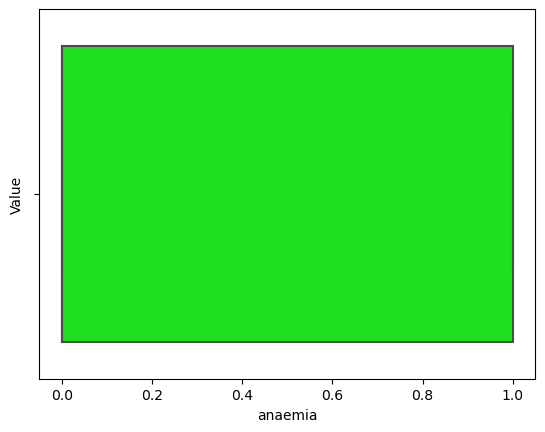

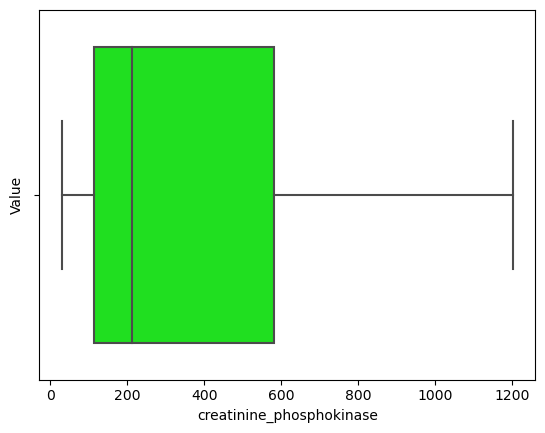

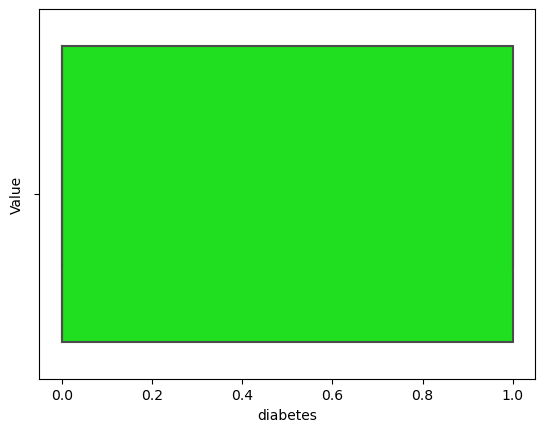

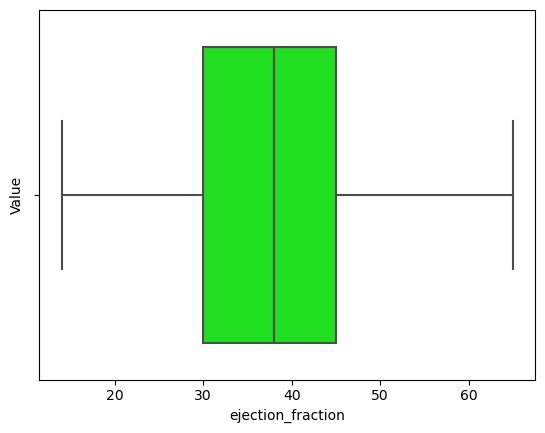

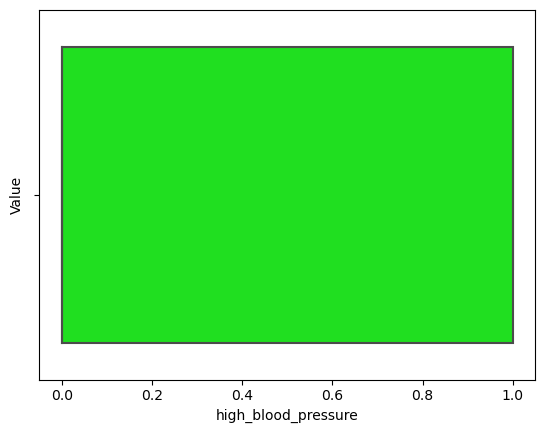

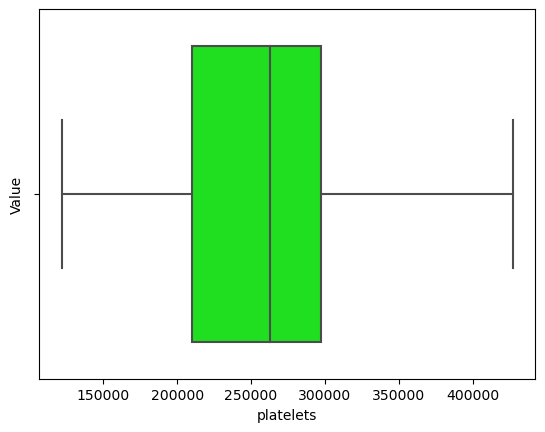

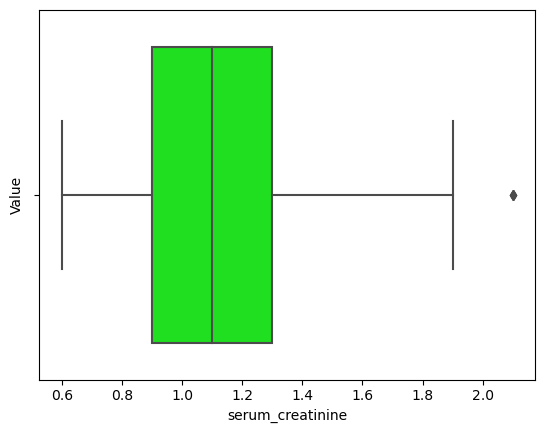

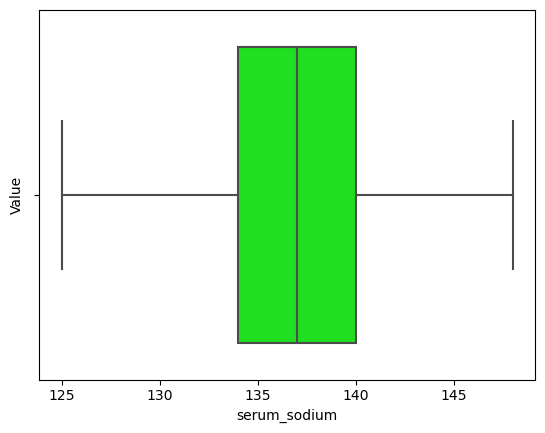

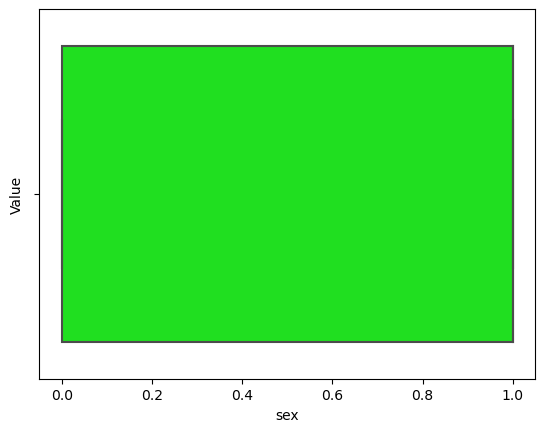

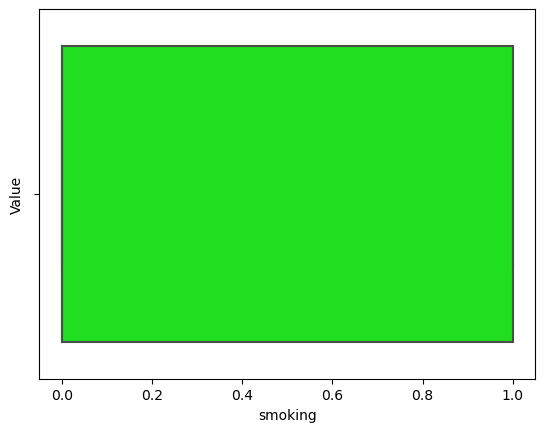

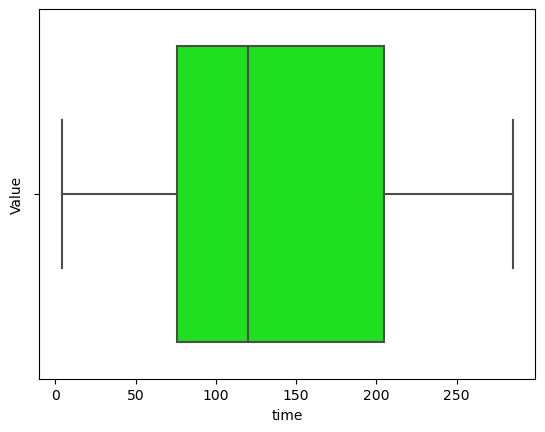

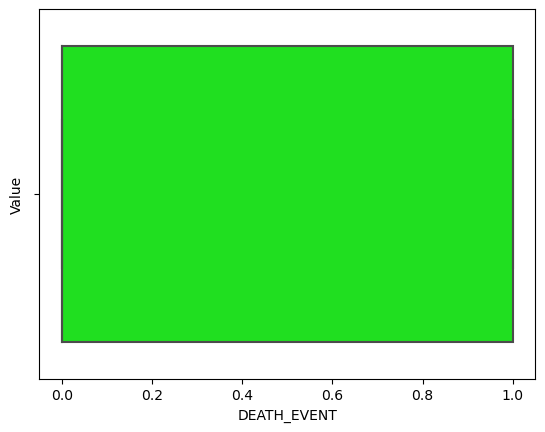

In [28]:
for o in e.columns:
    sns.boxplot(e[o],color='lime')
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

## Distribution Plot : 

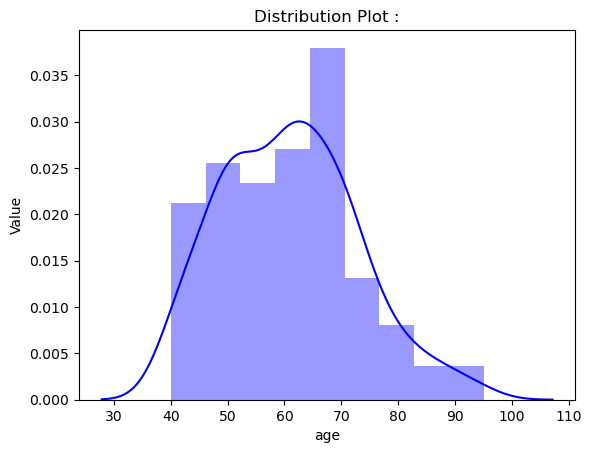

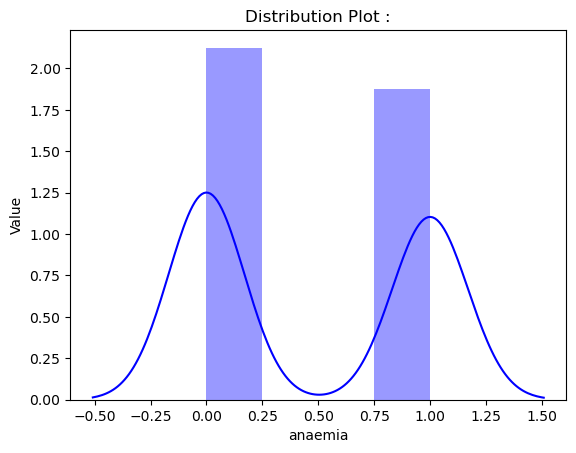

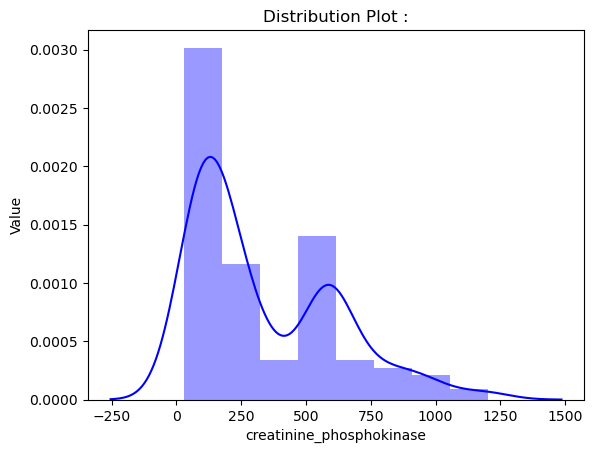

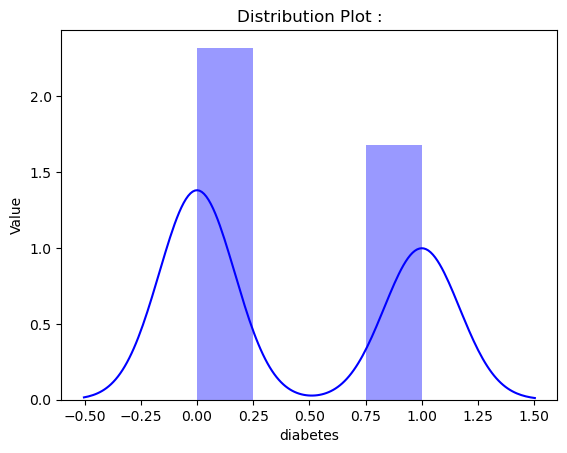

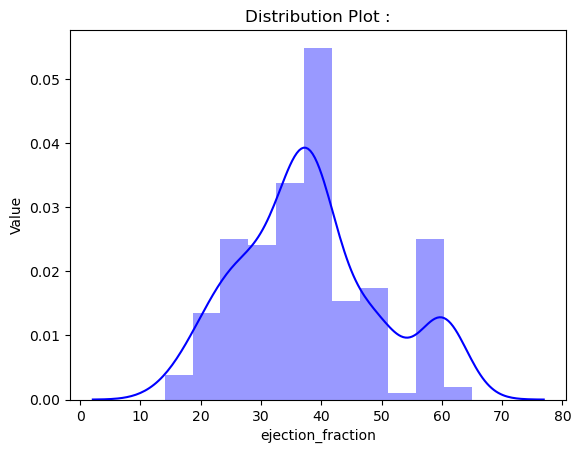

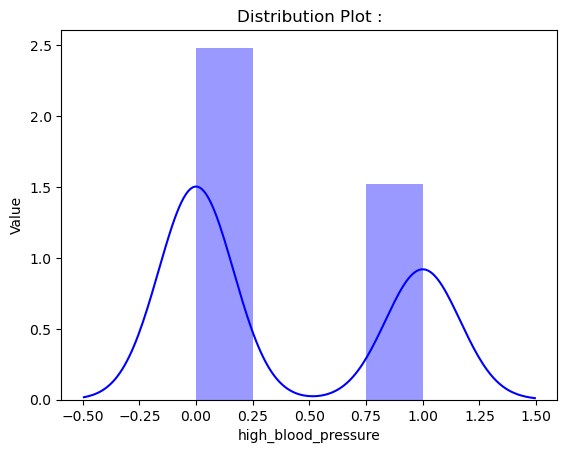

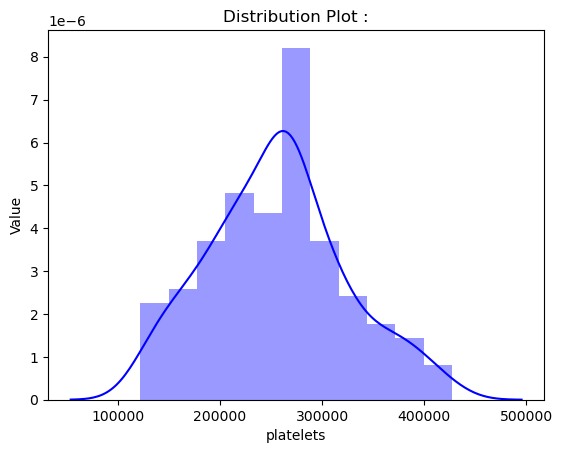

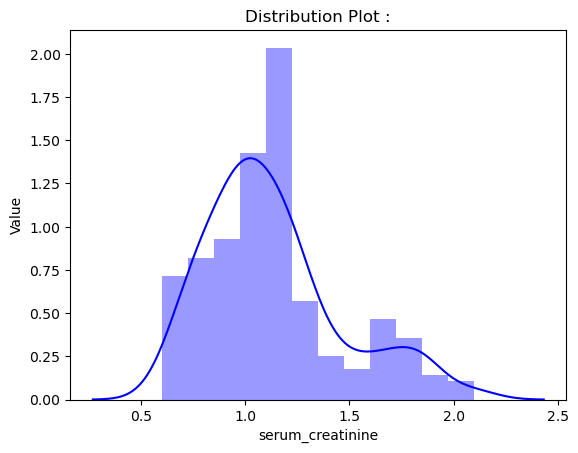

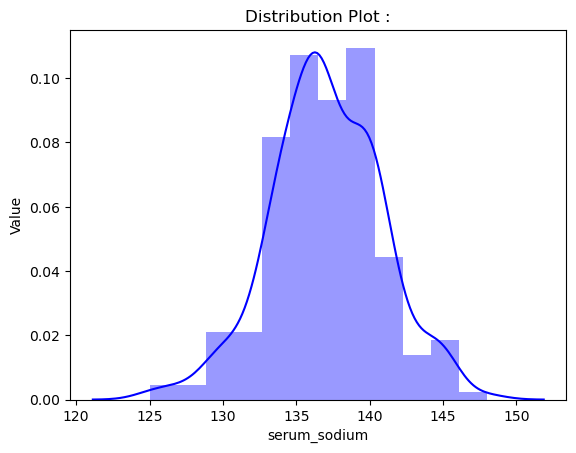

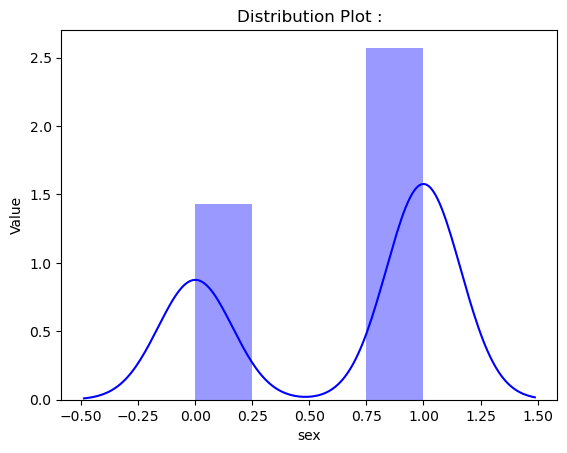

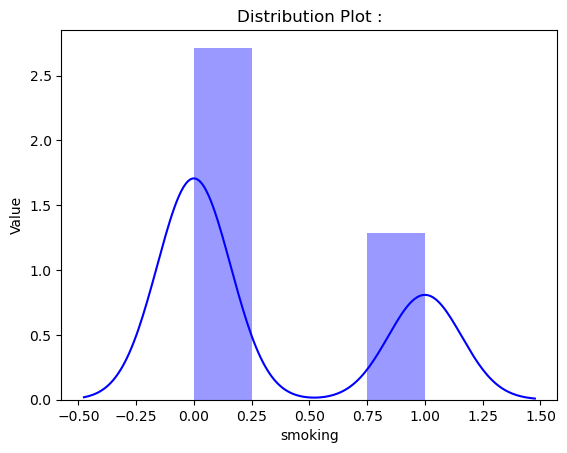

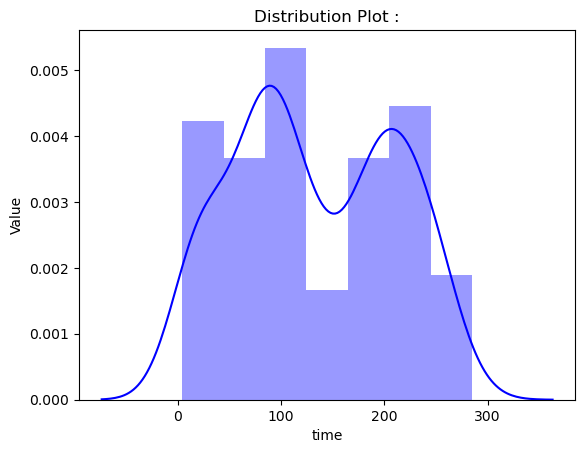

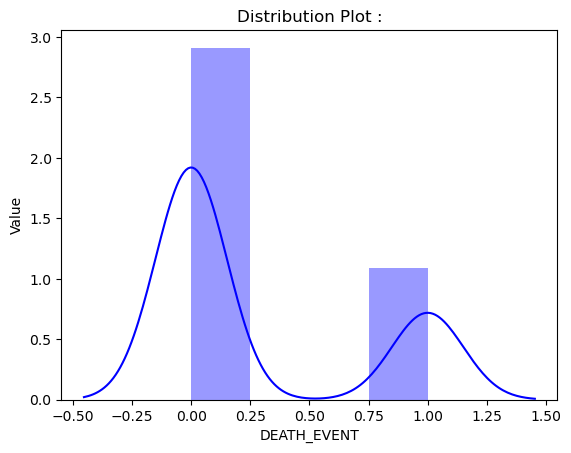

In [29]:
for x in e.columns:
    sns.distplot(e[x],color='blue')
    plt.xlabel(x)
    plt.ylabel('Value')
    plt.title('Distribution Plot :')
    plt.show()

## Spliting The Data :

In [30]:
X=e.drop(['DEATH_EVENT'],axis=1)
Y=e['DEATH_EVENT']

## Class Balancing :

In [31]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from imblearn.over_sampling import SMOTEN
from collections import Counter

In [33]:
smn=SMOTEN()
X_res,Y_res=smn.fit_resample(X,Y)
X_res.shape,Y_res.shape

((326, 12), (326,))

In [34]:
print('Before resampling {}'.format(Counter(Y)))
print('After resample {}'.format(Counter(Y_res)))

Before resampling Counter({0: 163, 1: 61})
After resample Counter({1: 163, 0: 163})


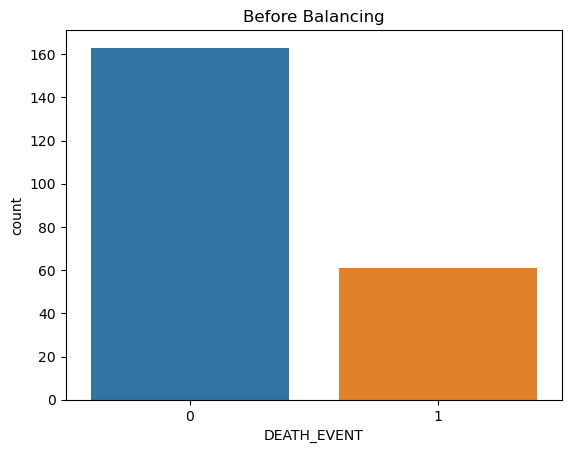

In [35]:
sns.countplot(Y)
plt.title('Before Balancing')
plt.show()

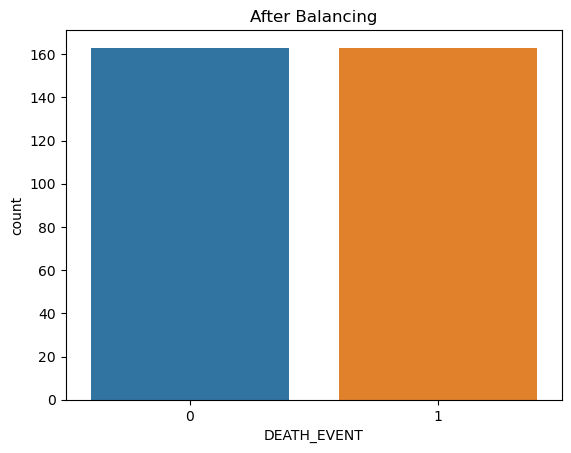

In [36]:
sns.countplot(Y_res)
plt.title('After Balancing')
plt.show()

## Feature Scaling :

In [37]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X1=std.fit_transform(X_res)

## Accuracy Inhance Function :

In [38]:
def best_data3(predictor,target,combination=10,random_state=0,train_size=0.7,bs_problem='class'):
    '''This function finds the best data combination for the models 
    and it's abal to take all the possible combinations that can give you the higist accuracy 
    
    *** predictor = (give data, contains indipandent variables )
    *** target = (The column that you are going to predict[target variable])
    *** combination =(How many combinations of data do you want ) [Int value ] by default : 10 
    *** random_state = (its just lock your record, you can change it to reach highest accuracy) by default : 0
    *** train_size = (its the percentage of data that is about go for training ) by default : 0.7
    *** bs_problem = ['class','reg'] --> use class to deal with the classification , use reg to deal with Regression problems
                                                                                      by default takes class as the value'''
    
    X=predictor
    Y=target
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
    from sklearn.svm import SVC,SVR
    from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
    from sklearn.ensemble import RandomForestRegressor
    import warnings
    warnings.filterwarnings('ignore')
    x_train=[]
    x_train1=[]
    avg=[]
    acc=[]
    avg_acc=[]
    i3=[]
    i4=[]
    a=0
    chunk=0
    if bs_problem == 'class':
        for i in range(random_state,random_state+combination):
            x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,train_size=train_size,random_state=i)
            x_train.append([x_train1,y_train1,x_test1,y_test1])
            log=LogisticRegression()
            svm=SVC()
            dis=DecisionTreeClassifier(random_state=random_state)
            nb=GaussianNB()
            dis
            clas=[log,svm,nb,dis]
        for x in x_train:
            for c in clas:
                c.fit(x[0],x[1])
                acc.append(c.score(x[2],x[3]))  
        for i in range(0, len(acc), 4):
            chunk = acc[i:i+4]
            i3.append(chunk)
        for i in i3:
            i4.append(sum(i)/len(i))
            a=i4.index(max(i4))
        x_train1=x_train[a][0]
        x_test1=x_train[a][2]
        y_train1=x_train[a][1]
        y_test1=x_train[a][3]
        print('The accuracy is '+str(max(i4)))
        return x_train1,x_test1,y_train1,y_test1
    elif bs_problem == 'reg':
        for i in range(random_state,random_state+combination):
            x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,train_size=train_size,random_state=i)
            x_train.append([x_train1,y_train1,x_test1,y_test1])
            lin=LinearRegression()
            rid=Ridge()
            dis1=DecisionTreeRegressor(random_state=random_state)
            rig=[lin,rid,dis1]
        for x in x_train:
            for c in rig:
                c.fit(x[0],x[1])
                acc.append(c.score(x[2],x[3]))
        for i in range(0, len(acc), 3):
            chunk = acc[i:i+3]
            i3.append(chunk)
        for i in i3:
            i4.append(sum(i)/len(i))
            a=i4.index(max(i4))
        x_train1=x_train[a][0]
        x_test1=x_train[a][2]
        y_train1=x_train[a][1]
        y_test1=x_train[a][3]
        print('The accuracy is '+str(max(i4)))
        return x_train1,x_test1,y_train1,y_test1
    elif bs_problem !='class' or bs_problem !='reg':
        print("you have input a wrong value as bs_problem")

In [39]:
x_train,x_test,y_train,y_test=best_data3(predictor=X1,target=Y_res,combination=4000,train_size=0.9,random_state=5)

The accuracy is 1.0


# Logistic Regression :

In [40]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pre=log.predict(x_test)

In [42]:
log.score(x_test,y_test)

1.0

In [43]:
log.score(x_train,y_train)

0.8805460750853242

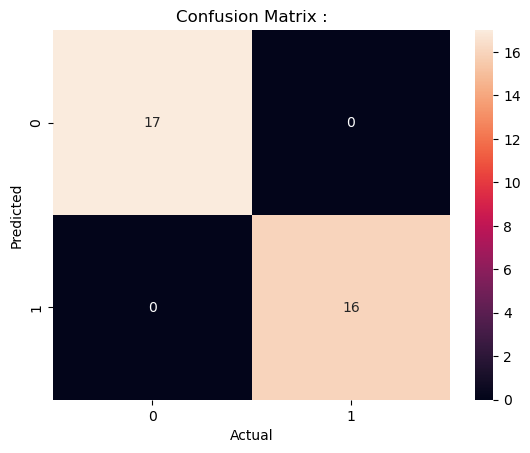

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [45]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [46]:
D=pd.DataFrame({'actual':y_test,'predicted':y_pre})
W=len(D.loc[D['actual']!=D['predicted']])
print('Total wrong predictions are = '+str(W))

Total wrong predictions are = 0


# Decision Tree Classifier :

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)

In [48]:
dt.score(x_test,y_test)

1.0

In [49]:
dt.score(x_train,y_train)

1.0

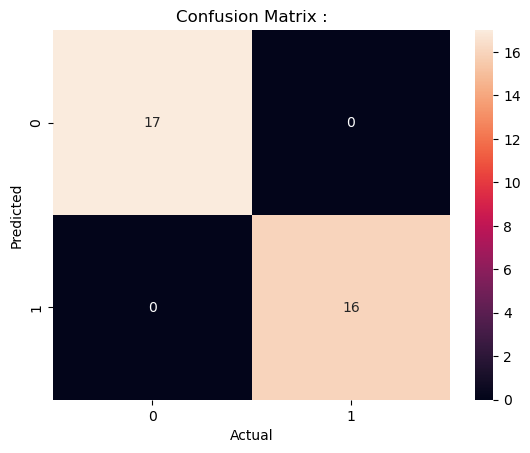

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pre_dt),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [51]:
print(classification_report(y_test,y_pre_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [52]:
D1=pd.DataFrame({'actual':y_test,'predicted':y_pre_dt})
W1=len(D1.loc[D1['actual']!=D1['predicted']])
print('Total wrong predictions are = '+str(W1))

Total wrong predictions are = 0


# Random Forest Classifier :

In [53]:
from sklearn.ensemble import RandomForestClassifier
lis=[50,55,45,60,65,45,69,66,70,75,80,88,85,92,90,95,99]
for r in lis:
    ran1=RandomForestClassifier(n_estimators=r,random_state=7)
    ran1.fit(x_train,y_train)
    y_pre_r=ran1.predict(x_test)
    print('for n_estimetor = ',r,'the accuracy is = '+str(accuracy_score(y_test,y_pre_r)))

for n_estimetor =  50 the accuracy is = 1.0
for n_estimetor =  55 the accuracy is = 1.0
for n_estimetor =  45 the accuracy is = 1.0
for n_estimetor =  60 the accuracy is = 1.0
for n_estimetor =  65 the accuracy is = 1.0
for n_estimetor =  45 the accuracy is = 1.0
for n_estimetor =  69 the accuracy is = 1.0
for n_estimetor =  66 the accuracy is = 1.0
for n_estimetor =  70 the accuracy is = 1.0
for n_estimetor =  75 the accuracy is = 1.0
for n_estimetor =  80 the accuracy is = 1.0
for n_estimetor =  88 the accuracy is = 1.0
for n_estimetor =  85 the accuracy is = 1.0
for n_estimetor =  92 the accuracy is = 1.0
for n_estimetor =  90 the accuracy is = 1.0
for n_estimetor =  95 the accuracy is = 1.0
for n_estimetor =  99 the accuracy is = 1.0


In [54]:
ran=RandomForestClassifier(n_estimators=45,random_state=0)
ran.fit(x_train,y_train)

RandomForestClassifier(n_estimators=45, random_state=0)

In [55]:
y_pre_rf=ran.predict(x_test)

In [56]:
ran.score(x_test,y_test)

1.0

In [57]:
ran.score(x_train,y_train)

1.0

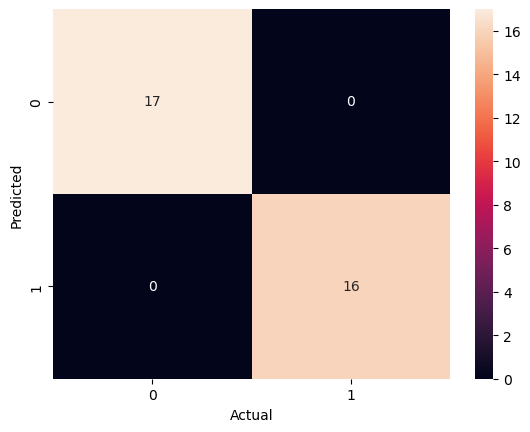

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pre_rf),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [59]:
print(classification_report(y_test,y_pre_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [60]:
D2=pd.DataFrame({'actual':y_test,'predicted':y_pre_rf})
W2=len(D2.loc[D2['actual']!=D2['predicted']])
print('Total wrong predictions are = '+str(W2))

Total wrong predictions are = 0


# Support Vector Machine (SVM) :
## RBF

In [61]:
from sklearn.svm import SVC
ga=[0.1,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,'auto']
for r in ga:
    sc1=SVC(gamma=r)
    sc1.fit(x_train,y_train)
    y_p=sc1.predict(x_test)
    print('for the gamma value ',r,' accuracy is = '+str(accuracy_score(y_test,y_p)))


for the gamma value  0.1  accuracy is = 1.0
for the gamma value  0.01  accuracy is = 1.0
for the gamma value  0.2  accuracy is = 1.0
for the gamma value  0.3  accuracy is = 0.9090909090909091
for the gamma value  0.4  accuracy is = 0.9090909090909091
for the gamma value  0.5  accuracy is = 0.9090909090909091
for the gamma value  0.6  accuracy is = 0.9090909090909091
for the gamma value  0.7  accuracy is = 0.9090909090909091
for the gamma value  0.8  accuracy is = 0.9090909090909091
for the gamma value  auto  accuracy is = 1.0


In [62]:
Sc1=SVC(kernel='rbf',gamma=0.1,random_state=5)
Sc1.fit(x_train,y_train)
y_pre_Sc1=Sc1.predict(x_test)

In [63]:
Sc1.score(x_test,y_test)

1.0

In [64]:
Sc1.score(x_train,y_train)

0.9522184300341296

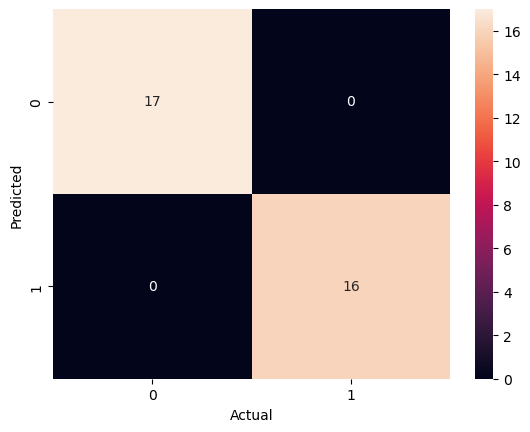

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc1),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
print(classification_report(y_test,y_pre_Sc1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [67]:
D3=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc1})
W3=len(D3.loc[D3['actual']!=D3['predicted']])
print('Total wrong predictions are = '+str(W3))

Total wrong predictions are = 0


## Linear

In [68]:
Sc2=SVC(kernel='linear')
Sc2.fit(x_train,y_train)
y_pre_Sc2=Sc2.predict(x_test)

In [69]:
Sc2.score(x_test,y_test)

1.0

In [70]:
Sc2.score(x_train,y_train)

0.8839590443686007

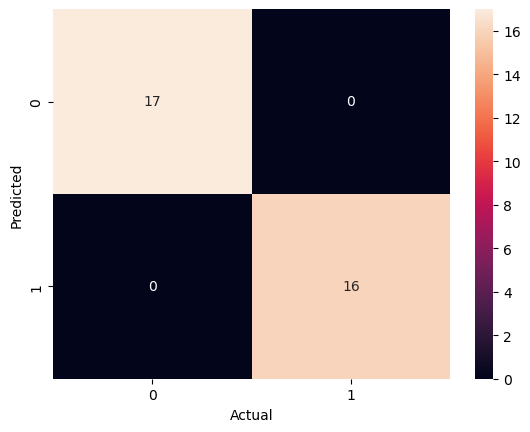

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc2),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [72]:
print(classification_report(y_test,y_pre_Sc2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [73]:
D4=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc2})
W4=len(D4.loc[D4['actual']!=D4['predicted']])
print('Total wrong predictions are = '+str(W4))

Total wrong predictions are = 0


## Poly 

In [74]:
for p in range(1,8):
    sc3=SVC(kernel='poly',degree=p,random_state=0)
    sc3.fit(x_train,y_train)
    print('for ',p,' accuracy is '+str(sc3.score(x_test,y_test)))



for  1  accuracy is 1.0
for  2  accuracy is 0.7272727272727273
for  3  accuracy is 1.0
for  4  accuracy is 0.696969696969697
for  5  accuracy is 1.0
for  6  accuracy is 0.6666666666666666
for  7  accuracy is 0.7272727272727273


In [75]:
Sc3=SVC(kernel='poly',degree=1,random_state=0)
Sc3.fit(x_train,y_train)
y_pre_Sc3=Sc3.predict(x_test)

In [76]:
Sc3.score(x_test,y_test)

1.0

In [77]:
Sc3.score(x_train,y_train)

0.8805460750853242

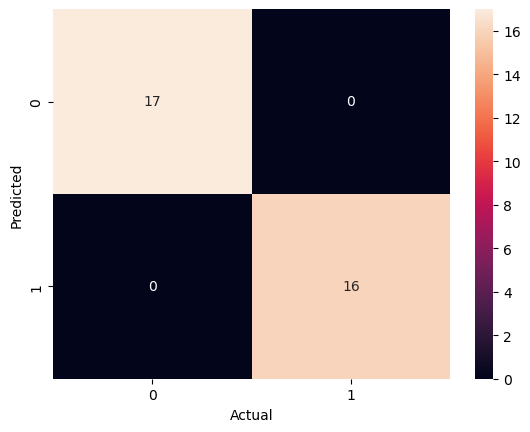

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc3),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [79]:
print(classification_report(y_test,y_pre_Sc3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [80]:
D5=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc3})
W5=len(D5.loc[D5['actual']!=D5['predicted']])
print('Total wrong predictions are = '+str(W5))

Total wrong predictions are = 0


## Sigmoid 

In [81]:
Sc4=SVC(kernel='sigmoid',random_state=2)
Sc4.fit(x_train,y_train)
y_pre_Sc4=Sc4.predict(x_test)

In [82]:
Sc4.score(x_test,y_test)

0.9696969696969697

In [83]:
Sc4.score(x_train,y_train)

0.8361774744027304

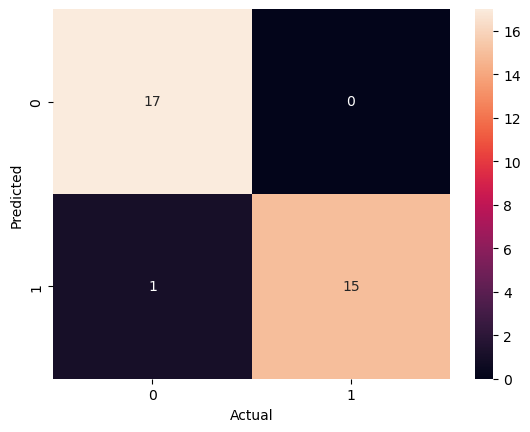

In [84]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc4),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [85]:
print(classification_report(y_test,y_pre_Sc4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        16

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [86]:
D6=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc4})
W6=len(D6.loc[D6['actual']!=D6['predicted']])
print('Total wrong predictions are = '+str(W6))

Total wrong predictions are = 1


# KNeighbors Classifier (KNN) :

In [87]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,10,1):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    print('for neighbors = ',k,' the accuracy is = '+str(KNN.score(x_test,y_test)))


for neighbors =  2  the accuracy is = 0.9090909090909091
for neighbors =  3  the accuracy is = 0.9090909090909091
for neighbors =  4  the accuracy is = 0.9090909090909091
for neighbors =  5  the accuracy is = 0.9090909090909091
for neighbors =  6  the accuracy is = 0.9090909090909091
for neighbors =  7  the accuracy is = 0.9090909090909091
for neighbors =  8  the accuracy is = 0.9393939393939394
for neighbors =  9  the accuracy is = 0.9696969696969697


In [88]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pre_knn=knn.predict(x_test)

In [89]:
knn.score(x_test,y_test)

0.9090909090909091

In [90]:
knn.score(x_train,y_train)

0.8839590443686007

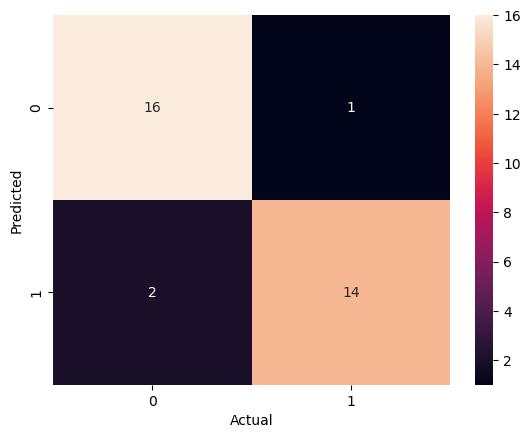

In [91]:
sns.heatmap(confusion_matrix(y_test,y_pre_knn),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [92]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.93      0.88      0.90        16

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



In [93]:
D7=pd.DataFrame({'actual':y_test,'predicted':y_pre_knn})
W7=len(D7.loc[D7['actual']!=D7['predicted']])
print('Total wrong predictions are = '+str(W7))

Total wrong predictions are = 3


# Naive Bayes :

In [94]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pre_nb=nb.predict(x_test)

In [95]:
nb.score(x_test,y_test)

1.0

In [96]:
nb.score(x_train,y_train)

0.8600682593856656

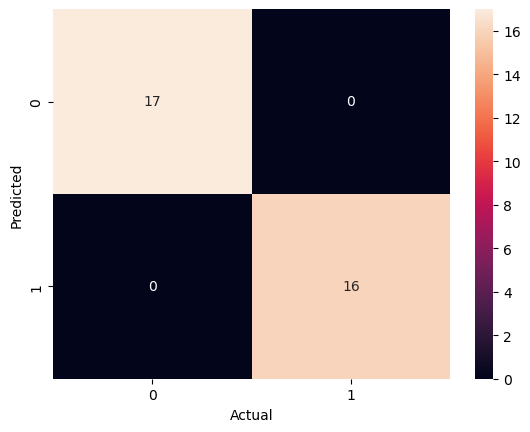

In [97]:
sns.heatmap(confusion_matrix(y_test,y_pre_nb),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [98]:
print(classification_report(y_test,y_pre_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [99]:
D8=pd.DataFrame({'actual':y_test,'predicted':y_pre_nb})
W8=len(D8.loc[D8['actual']!=D8['predicted']])
print('Total wrong predictions are = '+str(W8))

Total wrong predictions are = 0


# Ensemble Technique :
## Voting Classifier

In [100]:
from sklearn.ensemble import VotingClassifier
ran1=RandomForestClassifier(n_estimators=45,random_state=11)
ran2=RandomForestClassifier(n_estimators=60,random_state=11)
est1=(('ran',ran),('liner',Sc2),('ran1',ran1))
est2=(('ran',ran),('ran1',ran1))
lis3=[est1,est2]
lis4=['hard','soft']
for l in lis3:
    vc=VotingClassifier(estimators=l)
    vc.fit(x_train,y_train)
    print('for est = {} '.format(l),' the accuracy is = '+str(vc.score(x_test,y_test)))
    print()
        

for est = (('ran', RandomForestClassifier(n_estimators=45, random_state=0)), ('liner', SVC(kernel='linear')), ('ran1', RandomForestClassifier(n_estimators=45, random_state=11)))   the accuracy is = 1.0

for est = (('ran', RandomForestClassifier(n_estimators=45, random_state=0)), ('ran1', RandomForestClassifier(n_estimators=45, random_state=11)))   the accuracy is = 1.0



In [101]:
Vc=VotingClassifier(estimators=est1)
Vc.fit(x_train,y_train)
y_pre_Vc=Vc.predict(x_test)

In [102]:
Vc.score(x_test,y_test)

1.0

In [103]:
Vc.score(x_train,y_train)

1.0

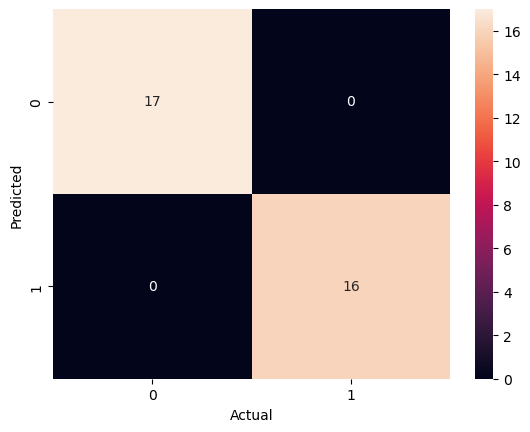

In [104]:
sns.heatmap(confusion_matrix(y_test,y_pre_Vc),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [105]:
print(classification_report(y_test,y_pre_Vc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [106]:
D9=pd.DataFrame({'actual':y_test,'predicted':y_pre_Vc})
W9=len(D9.loc[D9['actual']!=D9['predicted']])
print('Total wrong predictions are = '+str(W9))

Total wrong predictions are = 0


## Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier
es=[log,ran,Sc1,Sc3]
samples=[0.5,0.8,1.0]
features=[0.5,0.8,1.0]
for e in range(10,50,10):
    for f in features:
        for e1 in es:
            bag1=BaggingClassifier(n_estimators=e,base_estimator=e1,
                                       max_features=f,random_state=0)
            bag1.fit(x_train,y_train)
            print('model = {} , n_estimetor={}  ,feature={}'.format(e1,e,f),
                  ' accuracy is = '+str(bag1.score(x_test,y_test)))
            print()

model = LogisticRegression() , n_estimetor=10  ,feature=0.5  accuracy is = 1.0

model = RandomForestClassifier(n_estimators=45, random_state=0) , n_estimetor=10  ,feature=0.5  accuracy is = 1.0

model = SVC(gamma=0.1, random_state=5) , n_estimetor=10  ,feature=0.5  accuracy is = 0.9696969696969697

model = SVC(degree=1, kernel='poly', random_state=0) , n_estimetor=10  ,feature=0.5  accuracy is = 1.0

model = LogisticRegression() , n_estimetor=10  ,feature=0.8  accuracy is = 1.0

model = RandomForestClassifier(n_estimators=45, random_state=0) , n_estimetor=10  ,feature=0.8  accuracy is = 1.0

model = SVC(gamma=0.1, random_state=5) , n_estimetor=10  ,feature=0.8  accuracy is = 1.0

model = SVC(degree=1, kernel='poly', random_state=0) , n_estimetor=10  ,feature=0.8  accuracy is = 1.0

model = LogisticRegression() , n_estimetor=10  ,feature=1.0  accuracy is = 1.0

model = RandomForestClassifier(n_estimators=45, random_state=0) , n_estimetor=10  ,feature=1.0  accuracy is = 1.0

model = SVC(

In [108]:
bag=BaggingClassifier(base_estimator=ran,n_estimators=10,max_features=0.5,random_state=0)
bag.fit(x_train,y_train)
y_pre_bag=bag.predict(x_test)

In [109]:
bag.score(x_test,y_test)

1.0

In [110]:
bag.score(x_train,y_train)

0.962457337883959

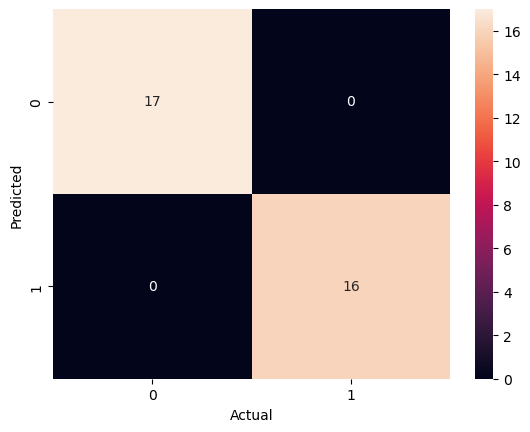

In [111]:
sns.heatmap(confusion_matrix(y_test,y_pre_bag),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [112]:
print(classification_report(y_test,y_pre_bag))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [113]:
D10=pd.DataFrame({'actual':y_test,'predicted':y_pre_bag})
W10=len(D10.loc[D10['actual']!=D10['predicted']])
print('Total wrong predictions are = '+str(W10))

Total wrong predictions are = 0


# Boosting Technique :

In [114]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [115]:
!pip install XGBoost

Defaulting to user installation because normal site-packages is not writeable


In [116]:
import xgboost
from xgboost import XGBClassifier
ada=AdaBoostClassifier(base_estimator=ran)
gr=GradientBoostingClassifier(loss='exponential')
xg=XGBClassifier()
l3=[ada,gr,xg]
for i in l3:
    i.fit(x_train,y_train)
    print('model = {}'.format(i),' ----- > accuracy =  '+str(i.score(x_test,y_test)),' and training accuracy = '+str(i.score(x_train,y_train)))
    print()

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=45,
                                                         random_state=0))  ----- > accuracy =  1.0  and training accuracy = 1.0

model = GradientBoostingClassifier(loss='exponential')  ----- > accuracy =  1.0  and training accuracy = 1.0

model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=Non

In [117]:
y_pre_ada=ada.predict(x_test)
y_pre_gr=gr.predict(x_test)
y_pre_xg=xg.predict(x_test)
D11=pd.DataFrame({'actual':y_test,'predicted':y_pre_ada})
W11=len(D11.loc[D11['actual']!=D11['predicted']])
D12=pd.DataFrame({'actual':y_test,'predicted':y_pre_gr})
W12=len(D12.loc[D12['actual']!=D12['predicted']])
D13=pd.DataFrame({'actual':y_test,'predicted':y_pre_xg})
W13=len(D13.loc[D13['actual']!=D13['predicted']])
print('Total wrong predictions are [Ada Boost] : '+str(W11))
print('Total wrong predictions are [Gradient Boost] : '+str(W12))
print('Total wrong predictions are [XG Boost] : '+str(W13))

Total wrong predictions are [Ada Boost] : 0
Total wrong predictions are [Gradient Boost] : 0
Total wrong predictions are [XG Boost] : 0


# Artificial Neural Network (ANN) :

In [118]:
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint
from keras .models import load_model

## Model (A)

In [119]:
from keras.callbacks import ModelCheckpoint
model_path="C:\\Users\\admin\\model_checkpoint1-{epoch:02d}-{val_accuracy:.2f}.h5"


In [120]:
ckeckpoint_1=ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [121]:
y1=load_model("C:\\Users\\admin\\Downloads\\model_checkpoint-03-0.57.h5")

In [122]:
pwd

'C:\\Users\\admin'

In [123]:
model1=model=keras.Sequential()
model1.add(Dense(50,input_dim=12,activation='relu'))
model1.add(Dense(100,activation='softmax'))
model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his5=model1.fit(x_train,y_train,epochs=50,callbacks=[ckeckpoint_1], batch_size=10,validation_split=0.5)

Epoch 1/50
11/15 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5818 
Epoch 1: val_accuracy improved from -inf to 0.46939, saving model to C:\Users\admin\model_checkpoint1-01-0.47.h5
15/15 [==============================] - 5s 51ms/step - loss: 0.6907 - accuracy: 0.6027 - val_loss: 0.6901 - val_accuracy: 0.4694
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5411
Epoch 2: val_accuracy did not improve from 0.46939
15/15 [==============================] - 0s 22ms/step - loss: 0.6863 - accuracy: 0.5411 - val_loss: 0.6868 - val_accuracy: 0.4694
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5685
Epoch 3: val_accuracy improved from 0.46939 to 0.57143, saving model to C:\Users\admin\model_checkpoint1-03-0.57.h5
15/15 [==============================] - 0s 17ms/step - loss: 0.6805 - accuracy: 0.5685 - val_loss: 0.6780 - val_accuracy: 0.5714
Epoch 4/50
15/15 [=============================

In [124]:
x1=model1.evaluate(x_test,y_test)

2/2 [==============================] - 0s 15ms/step - loss: 0.0318 - accuracy: 1.0000


In [125]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,951
Trainable params: 15,951
Non-trainable params: 0
_________________________________________________________________


In [126]:
from keras.models import load_model

In [127]:
model3=load_model("C:\\Users\\admin\\Downloads\\model_checkpoint-03-0.57.h5")

In [128]:
model3.save('model_3.h5')

## Loss Comparison  Between Training & Testing :

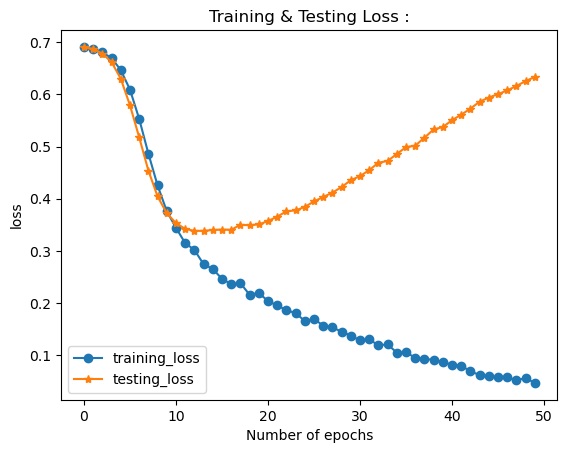

In [129]:
a1=his5.history
p=pd.DataFrame(a1)
p['epoch']=his5.epoch
plt.plot(p['epoch'],p['loss'],label='training_loss',marker='o')
plt.plot(p['epoch'],p['val_loss'],label='testing_loss',marker='*')
plt.title('Training & Testing Loss :')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Accuracy Comparison  Between Training & Testing :

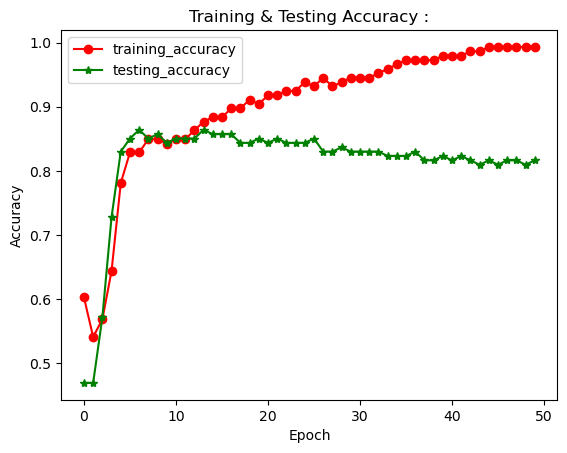

In [130]:
plt.plot(p['epoch'],p['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(p['epoch'],p['val_accuracy'],label='testing_accuracy',marker='*',color='green')
plt.title('Training & Testing Accuracy :')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Accuracy :

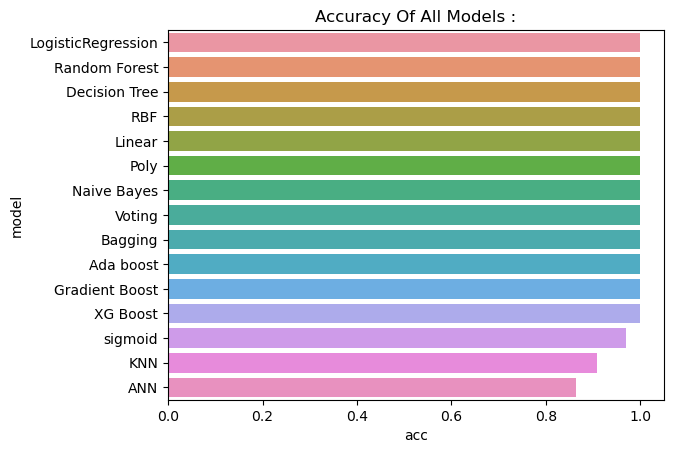

In [131]:
f_df1=pd.DataFrame({'acc':[log.score(x_test,y_test),ran.score(x_test,y_test),dt.score(x_test,y_test),Sc1.score(x_test,y_test),
                          Sc2.score(x_test,y_test),Sc3.score(x_test,y_test),Sc4.score(x_test,y_test),knn.score(x_test,y_test),
                          nb.score(x_test,y_test),vc.score(x_test,y_test),bag.score(x_test,y_test),ada.score(x_test,y_test),
                          gr.score(x_test,y_test),xg.score(x_test,y_test),p['val_accuracy'].max()],
                          'model':['LogisticRegression','Random Forest','Decision Tree','RBF','Linear','Poly','sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost','ANN']})
f_df1.sort_values('acc',ascending=False,inplace=True)
sns.barplot(f_df1['acc'],f_df1['model'])
plt.title('Accuracy Of All Models :')
plt.show()

## Model Wrong Prediction :

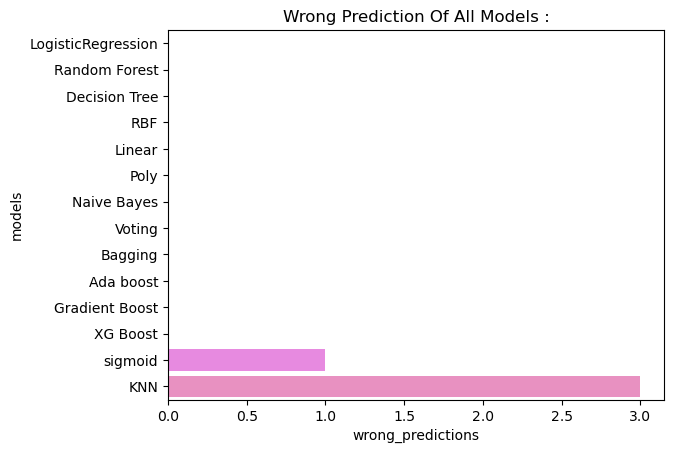

In [132]:
l_df=pd.DataFrame({'models':['LogisticRegression','Random Forest','Decision Tree','RBF','Linear','Poly','sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost'],
                  'wrong_predictions':[W,W2,W1,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13]})
l_df.sort_values('wrong_predictions',inplace=True)
sns.barplot(l_df['wrong_predictions'],l_df['models'])
plt.title('Wrong Prediction Of All Models :')
plt.show()

In [133]:
xo=load_model('model_1.h5')

In [134]:
xo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [135]:
from keras.callbacks import ModelCheckpoint

In [136]:
dd=load_model('mymodel.h5')